In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import missingno as msno
import plotly.express as px

In [2]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Load the dataset
def load_dataset(filepath):
    try:
        df = pd.read_csv(filepath)
        print("Dataset loaded successfully.")
        return df
    except FileNotFoundError:
        print("Error: File not found. Please check the file path.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


In [3]:
def summarize_dataset(df):
    print("First 5 rows of the dataset:")
    print(df.head())
    print(f"\nShape of the dataset: {df.shape}")
    print("\nDataset Info:")
    print(df.info())
    print("\nMissing values in each column:")
    print(df.isnull().sum())

In [4]:
# Visualize missing values
def visualize_missing_values(df):
    msno.matrix(df)
    plt.show()
    msno.bar(df)
    plt.show()

In [5]:
# Handle missing data
def handle_missing_data(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
    print("\nMissing values handled by filling with the median.")
    return df


In [6]:
# Remove duplicate rows
def remove_duplicates(df):
    duplicates = df.duplicated().sum()
    print(f"\nThere are {duplicates} duplicate rows in the dataset.")
    df = df.drop_duplicates()
    print("Duplicates removed.")
    return df

In [7]:
# Remove outliers using Z-score
def remove_outliers(df, column, z_thresh=3):
    """
    Remove outliers from a specified column using Z-score.

    """
    if column not in df.columns:
        print(f"Column '{column}' not found in dataset. Skipping outlier removal.")
        return df
    z_scores = np.abs(stats.zscore(df[column].dropna()))
    df = df[z_scores < z_thresh]
    print(f"Outliers removed from column '{column}' using Z-score threshold of {z_thresh}.")
    return df

In [8]:
# Display descriptive statistics
def display_descriptive_stats(df):
    print("\nDescriptive Statistics:")
    print(df.describe())


In [9]:
# Plot the distribution of a numeric column
def plot_distribution(df, column):
    if column in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"Column '{column}' not found in dataset. Skipping distribution plot.")

In [10]:
# Pairplot for selected columns
def plot_pairplot(df, columns):
    selected_columns = [col for col in columns if col in df.columns]
    if selected_columns:
        sns.pairplot(df[selected_columns])
        plt.suptitle("Pairplot of Selected Columns", y=1.02)
        plt.show()
    else:
        print("No valid columns found for pairplot.")


In [11]:
# Trend plot for yearly data
def plot_trend(df, years):
    available_years = [year for year in years if year in df.columns]
    if available_years:
        df[available_years].mean().plot(figsize=(12, 6), marker='o')
        plt.title("Yearly Trend of Average Values")
        plt.xlabel("Year")
        plt.ylabel("Average Value")
        plt.show()
    else:
        print("No valid years found for trend plot.")

In [12]:
# Bar Chart for Categorical Data with Top N Categories
def plot_bar_chart(df, column, top_n=10):
    if column in df.columns:
        top_categories = df[column].value_counts().head(top_n)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_categories.index, y=top_categories.values)
        plt.title(f'Top {top_n} {column} Distribution (Bar Chart)')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Column '{column}' not found in dataset. Skipping bar chart.")

In [13]:
# Pie Chart for Gender Unemployment Rate
def plot_gender_unemployment_pie(df, gender_column, rate_column):
    if gender_column in df.columns and rate_column in df.columns:
        avg_unemployment_by_gender = df.groupby(gender_column)[rate_column].mean()
        plt.figure(figsize=(8, 8))
        avg_unemployment_by_gender.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Pastel1')
        plt.title('Average Unemployment Rate by Gender')
        plt.ylabel('')
        plt.show()
    else:
        print(f"Columns '{gender_column}' or '{rate_column}' not found in dataset. Skipping gender unemployment pie chart.")


In [14]:
# Box Plot with Grouping by Category
def plot_box_plot(df, column, group_by=None):
    if column in df.columns:
        if group_by and group_by in df.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=group_by, y=column, data=df)
            plt.title(f'{column} by {group_by} (Box Plot)')
            plt.xlabel(group_by)
            plt.ylabel(column)
            plt.show()
        else:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=df[column])
            plt.title(f'{column} Box Plot')
            plt.xlabel(column)
            plt.show()
    else:
        print(f"Column '{column}' not found in dataset. Skipping box plot.")


In [15]:
# KDE Plot for a numeric column
def plot_kde(df, column):
    if column in df.columns:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(df[column], shade=True)
        plt.title(f'{column} KDE Plot')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.show()
    else:
        print(f"Column '{column}' not found in dataset. Skipping KDE plot.")

In [16]:
# Stacked Bar Chart for Yearly Data
def plot_stacked_bar_chart(df, years, group_by=None):
    available_years = [year for year in years if year in df.columns]
    if available_years:
        if group_by and group_by in df.columns:
            df_grouped = df.groupby([group_by])[available_years].sum()
            df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))
            plt.title(f'Stacked Bar Chart by {group_by} (Yearly Data)')
        else:
            df[available_years].plot(kind='bar', stacked=True, figsize=(12, 8))
            plt.title('Stacked Bar Chart (Yearly Data)')
        plt.xlabel('Index')
        plt.ylabel('Values')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("No valid years found for stacked bar chart.")

In [17]:
# Interactive Bar Chart for Categorical Data with Plotly
def plot_interactive_bar_chart(df, column, top_n=10):
    if column in df.columns:
        top_categories = df[column].value_counts().head(top_n)
        fig = px.bar(top_categories, x=top_categories.index, y=top_categories.values, 
                     labels={column: 'Category', 'y': 'Count'},
                     title=f'Top {top_n} {column} Distribution (Interactive Bar Chart)')
        fig.show()
    else:
        print(f"Column '{column}' not found in dataset. Skipping interactive bar chart.")


In [18]:
def plot_unemployment_by_age_group(df, age_group_column, year_columns):
    """
    Plots the average unemployment rate for each age group across selected years.

    """
    if age_group_column not in df.columns or not all(year in df.columns for year in year_columns):
        print("Error: Missing required columns in the dataset.")
        return

    # Calculate the average unemployment rate for each age group across selected years
    age_group_avg = (
        df.groupby(age_group_column)[year_columns]
        .mean(numeric_only=True)
        .mean(axis=1)
        .sort_values(ascending=False)
    )
    
    # Plot the average unemployment rate by age group as a bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=age_group_avg.index, y=age_group_avg.values, palette='viridis')
    plt.title('Average Unemployment Rate by Age Group (Selected Years)', fontsize=16)
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Average Unemployment Rate', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


In [19]:
# Correlation Heatmap
def plot_correlation_heatmap(df):
    numeric_columns = df.select_dtypes(include='number').columns
    correlation_matrix = df[numeric_columns].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

In [20]:
# Enhanced Visualizations
def plot_all_feature_distributions(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for column in numeric_columns:
        plot_distribution(df, column)
        plot_kde(df, column)

def plot_all_boxplots(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for column in numeric_columns:
        plot_box_plot(df, column)

In [21]:
def plot_scatter_geo(df, rate_col):
    if 'country_name' in df.columns and rate_col in df.columns:
        fig = px.scatter_geo(df, locations='country_name', locationmode='country names',
                             size=rate_col, title='Global Unemployment Rates',
                             color=rate_col, color_continuous_scale='Viridis')
        fig.update_layout(margin={'r': 0, 't': 50, 'l': 0, 'b': 0})
        fig.show()
    else:
        print("Error: Required columns for scatter plot are missing.")

In [22]:
def plot_top_20_countries_by_avg_unemployment(df, rate_column='2024', country_column='country_name'):
    if country_column in df.columns and rate_column in df.columns:
        # Calculate average unemployment rate per country
        avg_unemployment = df.groupby(country_column)[rate_column].mean().sort_values(ascending=False).head(20)

        # Plot the bar graph
        plt.figure(figsize=(12, 8))
        sns.barplot(x=avg_unemployment.values, y=avg_unemployment.index, palette='coolwarm')
        plt.title('Top 20 Countries by Average Unemployment Rate', fontsize=16)
        plt.xlabel('Average Unemployment Rate', fontsize=14)
        plt.ylabel('Country', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Columns '{country_column}' or '{rate_column}' not found in the dataset. Skipping the plot.")

In [23]:
def plot_top_10_countries_pie_chart(df, years, country_column='country_name'):
    # Check if the country column and selected years exist in the dataset
    if country_column in df.columns and all(year in df.columns for year in years):
        # Calculate the average unemployment rate across selected years for each country
        df['avg_unemployment'] = df[years].mean(axis=1)
        
        # Group by country and calculate the overall average
        avg_unemployment = df.groupby(country_column)['avg_unemployment'].mean().sort_values(ascending=False).head(10)
        
        # Plot the pie chart
        plt.figure(figsize=(8, 8))
        avg_unemployment.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab10')
        plt.title('Top 10 Countries by Average Unemployment Rate Across Selected Years', fontsize=16)
        plt.ylabel('')  
        plt.tight_layout()
        plt.show()
    else:
        missing_years = [year for year in years if year not in df.columns]
        print(f"Missing columns: {missing_years}. Please check the dataset.")

In [24]:
def plot_top_10_countries_stacked_bar_chart(df, years, country_column='country_name'):
    # Check if the country column and selected years exist in the dataset
    if country_column in df.columns and all(year in df.columns for year in years):
        # Calculate the average unemployment rate for each country across the selected years
        df['avg_unemployment'] = df[years].mean(axis=1)
        
        # Group by the country column and calculate the average unemployment rate
        avg_by_country = df.groupby(country_column)['avg_unemployment'].mean()
        
        # Get the top 10 countries by average unemployment rate
        top_countries = avg_by_country.sort_values(ascending=False).head(10).index
        
        # Filter the dataset for these top 10 countries
        top_countries_df = df[df[country_column].isin(top_countries)]
        
        # Pivot the data to prepare for stacked bar plotting
        stacked_data = top_countries_df.groupby(country_column)[years].mean()
        
        # Plot the stacked bar chart
        stacked_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
        plt.title('Stacked Bar Chart of Average Unemployment Rate by Year (Top 10 Countries)', fontsize=16)
        plt.xlabel('Country', fontsize=12)
        plt.ylabel('Unemployment Rate', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title="Years", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        missing_years = [year for year in years if year not in df.columns]
        print(f"Missing columns: {missing_years}. Please check the dataset.")

In [25]:
def plot_unemployment_trends(df, country_column, years):
    """
    Plots unemployment rate trends over time for each country.
    """
    plt.figure(figsize=(12, 8))
    for country in df[country_column].unique():
        country_data = df[df[country_column] == country]
        plt.plot(years, country_data[years].mean(), label=country)

    plt.title('Unemployment Rate Trends by Country', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Unemployment Rate', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()


In [26]:
def plot_unemployment_by_gender(df, gender_column, year_columns):
    """
    Plots average unemployment rates by gender.

    """
    gender_avg = df.groupby(gender_column)[year_columns].mean().mean(axis=1)
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=gender_avg.index, y=gender_avg.values, palette='pastel')
    plt.title('Average Unemployment Rate by Gender', fontsize=16)
    plt.xlabel('Gender', fontsize=14)
    plt.ylabel('Average Unemployment Rate', fontsize=14)
    plt.show()


In [27]:
def plot_correlation_with_age_group(df, age_group_column, year_columns):
    """
    Plots a heatmap showing the correlation between age groups and unemployment rates.
   
    """
    correlation_data = df.pivot_table(index=age_group_column, values=year_columns, aggfunc='mean').corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
    plt.title('Correlation Between Age Groups and Unemployment', fontsize=16)
    plt.show()


In [28]:
import plotly.express as px

def plot_high_unemployment_map(df, country_column, year_column):
    """
    Plots an interactive map showing unemployment rates across countries.
    
    
    """
    fig = px.choropleth(df, locations=country_column, locationmode='country names',
                        color=year_column, title=f'Unemployment Rates in {year_column}',
                        color_continuous_scale='reds')
    fig.show()


In [29]:
def plot_age_gender_unemployment(df, age_column, gender_column, rate_column):
    """
    Plots a box plot to compare unemployment rates by age and gender.
    
    
    """
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=age_column, y=rate_column, hue=gender_column, data=df)
    plt.title('Unemployment Rate by Age Group and Gender', fontsize=16)
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Unemployment Rate', fontsize=14)
    plt.legend(title='Gender', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()


In [30]:
def compare_unemployment_by_gender_and_age(df, year='2023'):
    """
    Compare unemployment rates across gender and age groups for a given year.

    - A bar plot comparing unemployment rates across gender and age groups.
    """
    plt.figure(figsize=(12, 6))
    sns.barplot(x='sex', y=year, hue='age_group', data=df)
    plt.title(f'Unemployment Rate by Gender and Age Group in {year}')
    plt.xlabel('Gender')
    plt.ylabel('Unemployment Rate %')
    plt.show()

In [31]:
def scatterplot_unemployment_by_age(df, year='2024'):
    """
    Create a scatterplot to visualize unemployment rates across age categories for a given year.
    """
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='age_categories', y=year, data=df)
    plt.title(f'Unemployment Rate by Age Categories in {year}')
    plt.xlabel('Age Categories')
    plt.ylabel('Unemployment Rate %')
    plt.show()

In [32]:


def countplot_and_scatterplot_unemployment(df):
    """
    Create a countplot to visualize the distribution of unemployment across different age categories,
    and a scatterplot to show the relationship between age categories and unemployment rate for 2024.

    """
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Countplot on the first axis
    sns.countplot(x='age_categories', data=df, palette='Set2', ax=axes[0])
    axes[0].set_title('Distribution of Unemployment Across Age Categories')
    axes[0].set_xlabel('Age Categories')
    axes[0].set_ylabel('Count')

    # Scatterplot on the second axis
    sns.scatterplot(x='age_categories', y='2024', data=df, ax=axes[1], palette='Set2')
    axes[1].set_title('Relationship Between Age Categories and Unemployment Rate in 2024')
    axes[1].set_xlabel('Age Categories')
    axes[1].set_ylabel('Unemployment Rate %')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()




In [33]:
def plot_violinplot(df, column, by):
    sns.violinplot(x=by, y=column, data=df)
    plt.xlabel(by.capitalize())
    plt.ylabel(column.capitalize())
    plt.title(f'Distribution of {column.capitalize()} by {by.capitalize()}')
    plt.show()

Dataset loaded successfully.
First 5 rows of the dataset:
  country_name                    indicator_name     sex age_group  \
0  Afghanistan  Unemployment rate by sex and age  Female     15-24   
1  Afghanistan  Unemployment rate by sex and age  Female       25+   
2  Afghanistan  Unemployment rate by sex and age  Female  Under 15   
3  Afghanistan  Unemployment rate by sex and age    Male     15-24   
4  Afghanistan  Unemployment rate by sex and age    Male       25+   

  age_categories    2014    2015    2016    2017    2018    2019    2020  \
0          Youth  13.340  15.974  18.570  21.137  20.649  20.154  21.228   
1         Adults   8.576   9.014   9.463   9.920  11.223  12.587  14.079   
2       Children  10.306  11.552  12.789  14.017  14.706  15.418  16.783   
3          Youth   9.206  11.502  13.772  16.027  15.199  14.361  14.452   
4         Adults   6.463   6.879   7.301   7.728   7.833   7.961   8.732   

     2021    2022    2023    2024  
0  21.640  30.561  32.200  3

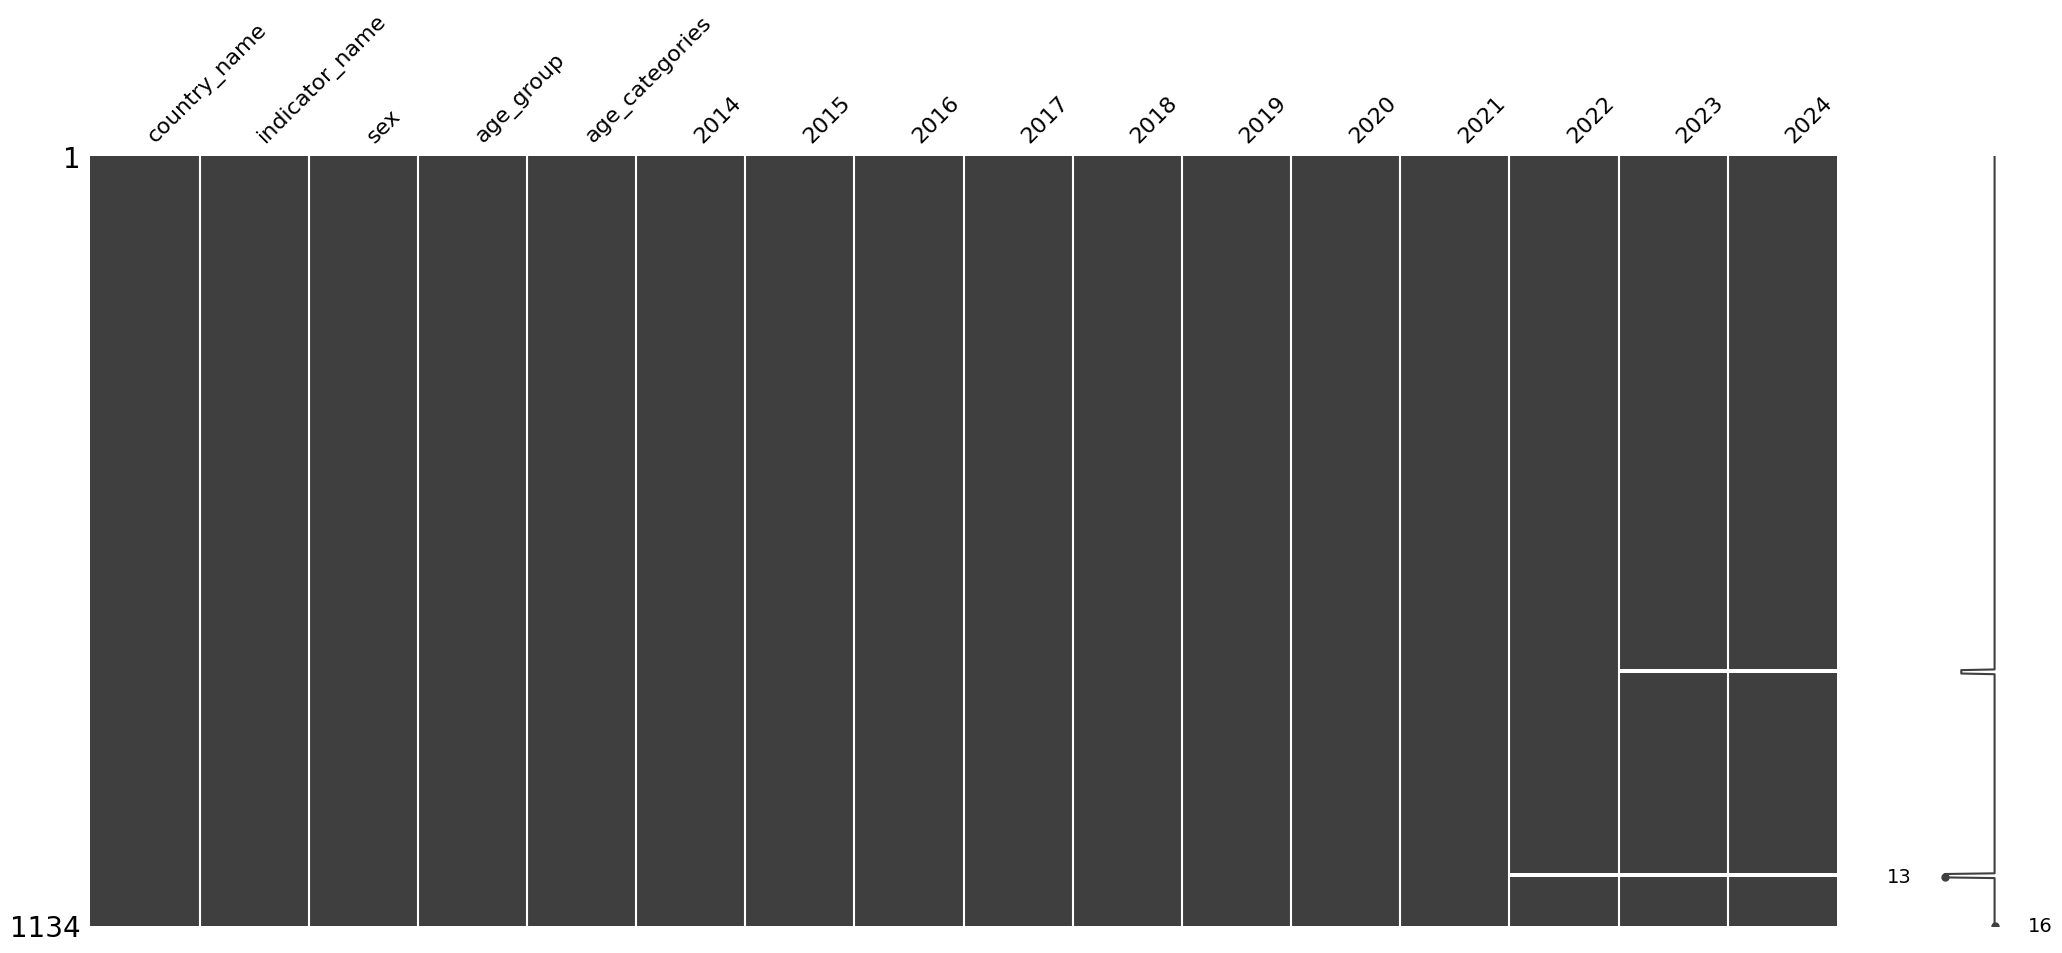

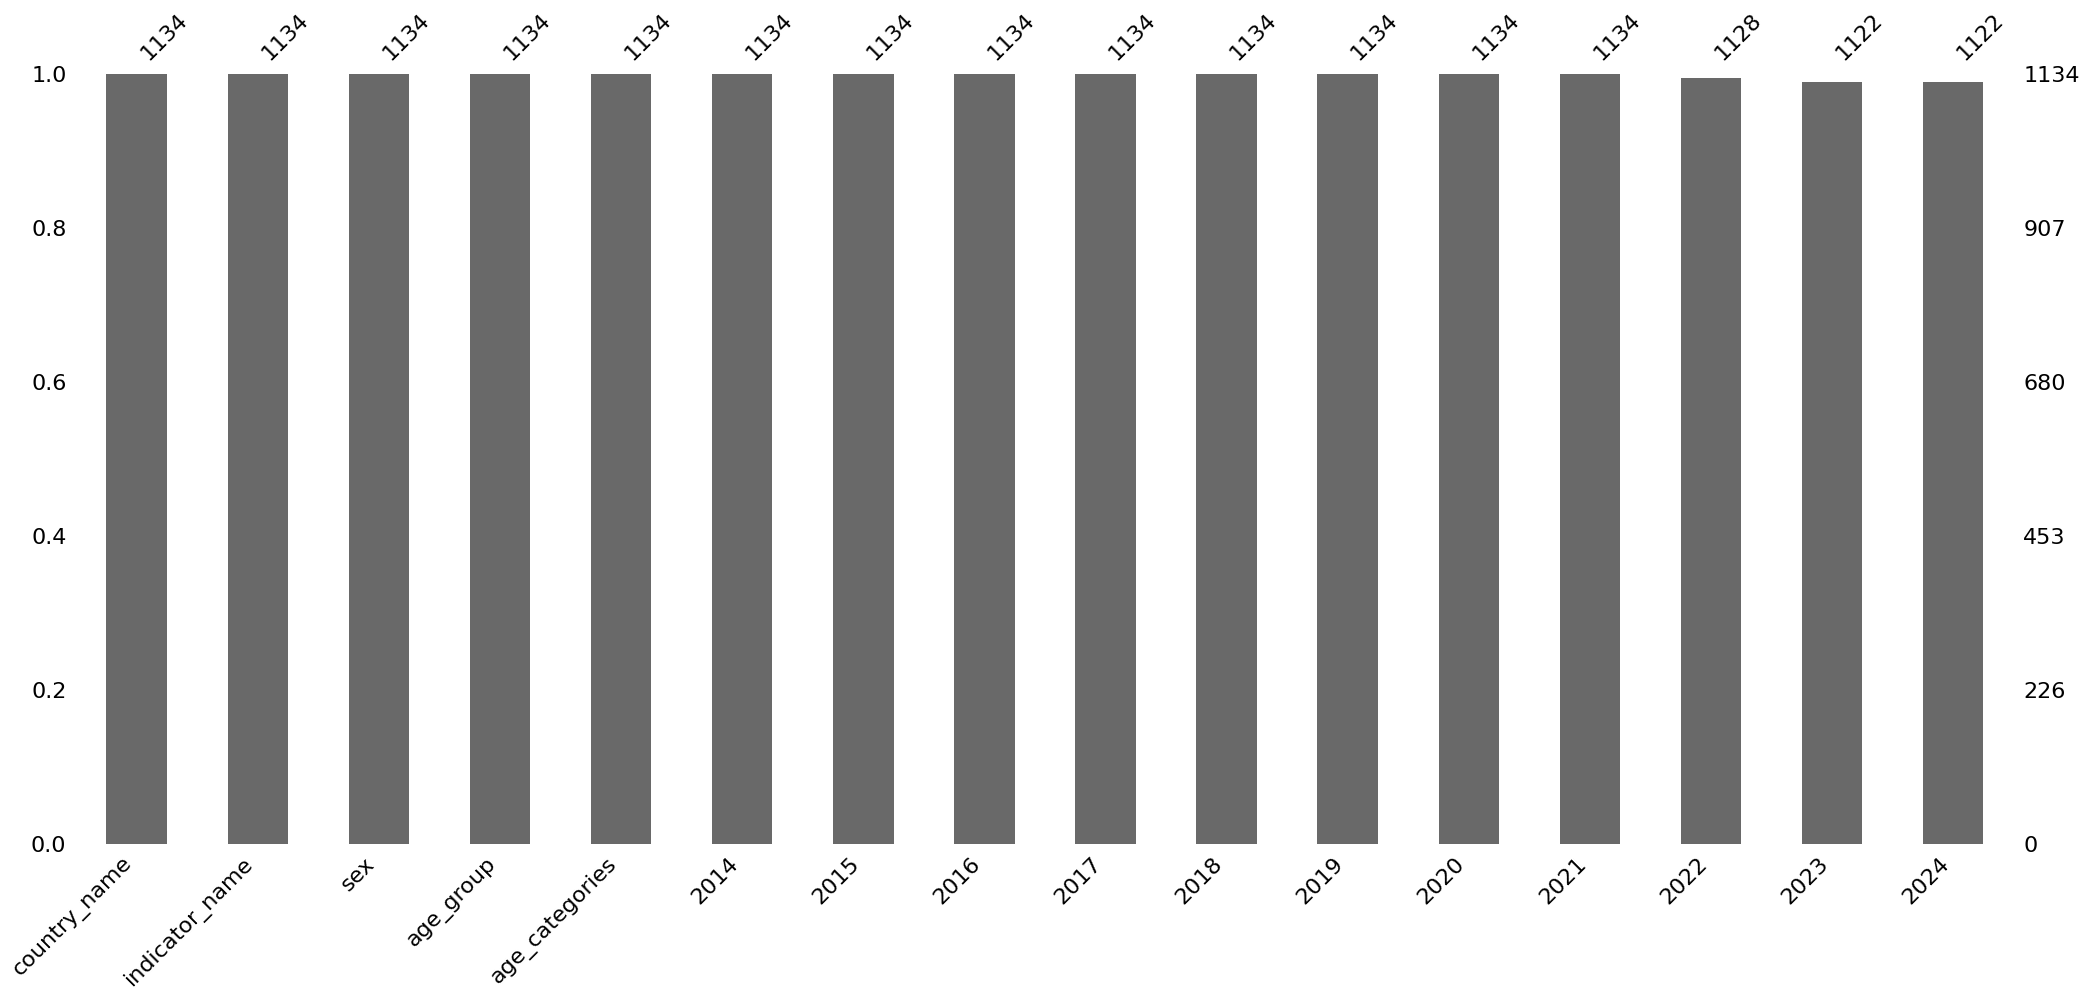


Missing values handled by filling with the median.

There are 0 duplicate rows in the dataset.
Duplicates removed.

Descriptive Statistics:
              2014         2015         2016         2017         2018  \
count  1134.000000  1134.000000  1134.000000  1134.000000  1134.000000   
mean     11.387800    11.272444    11.122963    10.863516    10.516499   
std      11.119002    10.915942    10.742947    10.640980    10.527773   
min       0.027000     0.034000     0.038000     0.035000     0.044000   
25%       3.933500     3.993500     3.945250     3.747500     3.672750   
50%       7.697500     7.547500     7.504500     7.140500     6.706000   
75%      15.050750    14.766250    14.467500    14.142000    13.343000   
max      74.485000    74.655000    74.720000    75.416000    76.395000   

              2019         2020         2021         2022         2023  \
count  1134.000000  1134.000000  1134.000000  1134.000000  1134.000000   
mean     10.311452    11.851285    11.422645

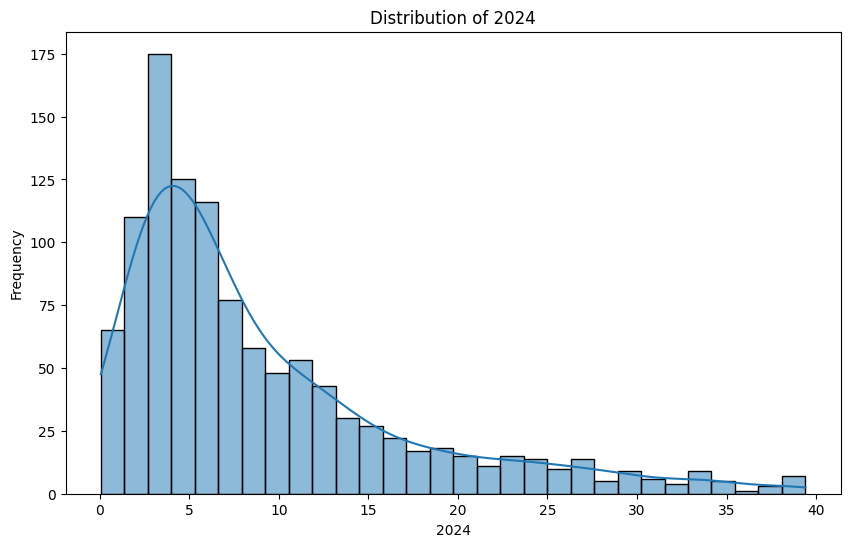

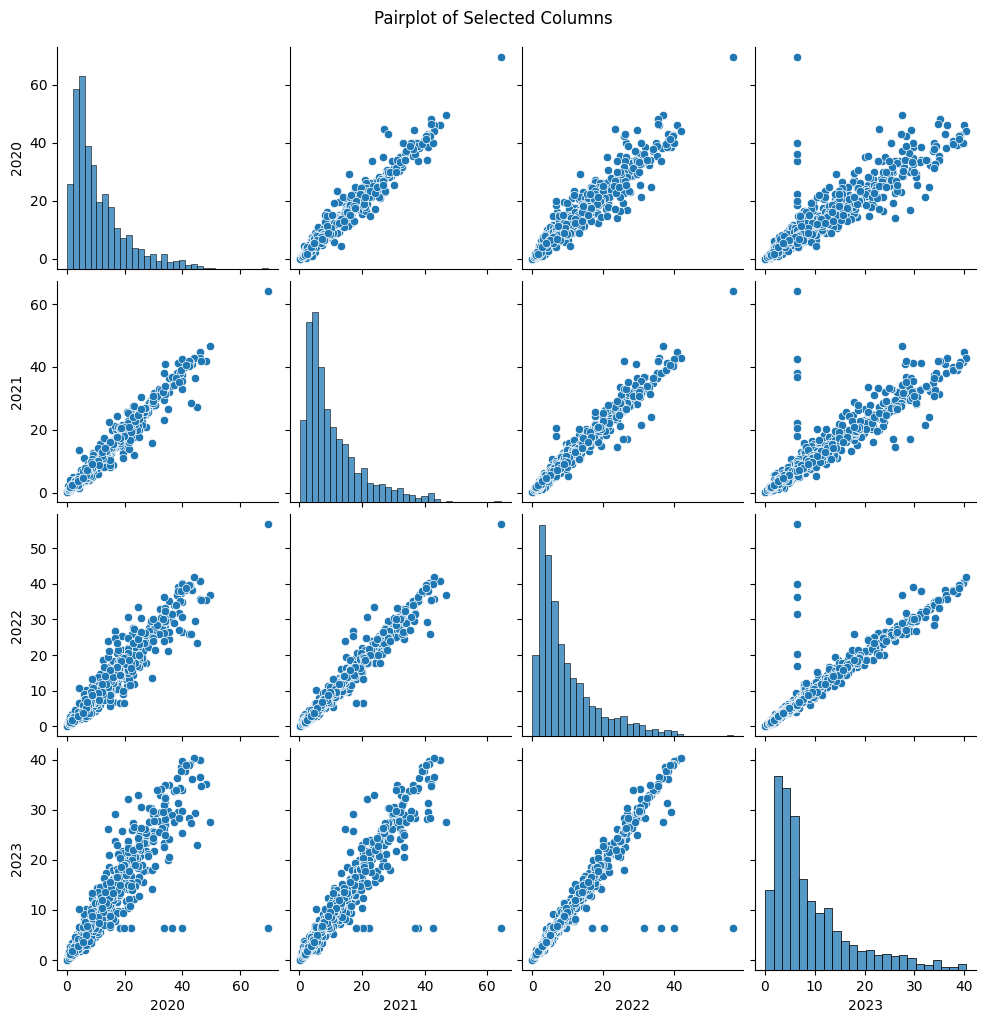

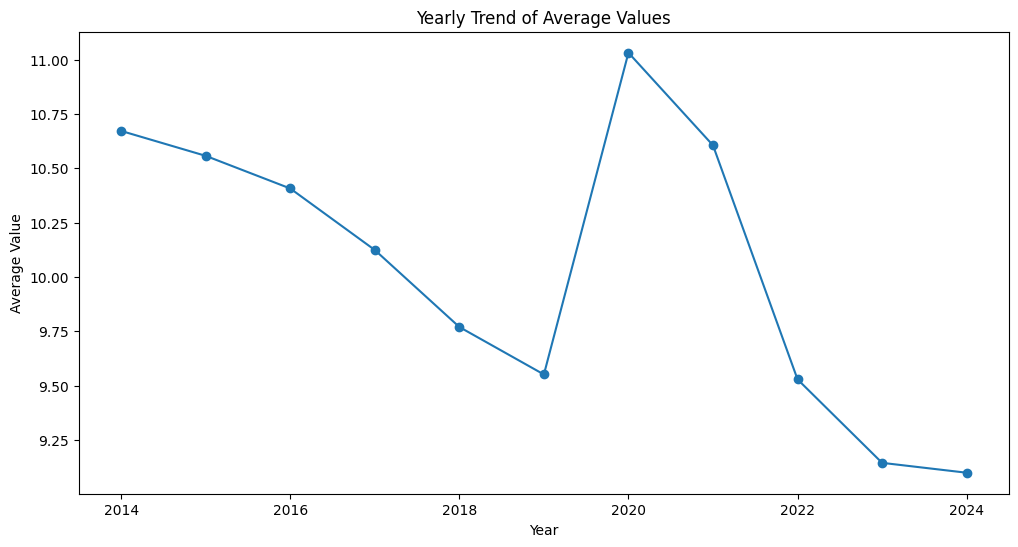

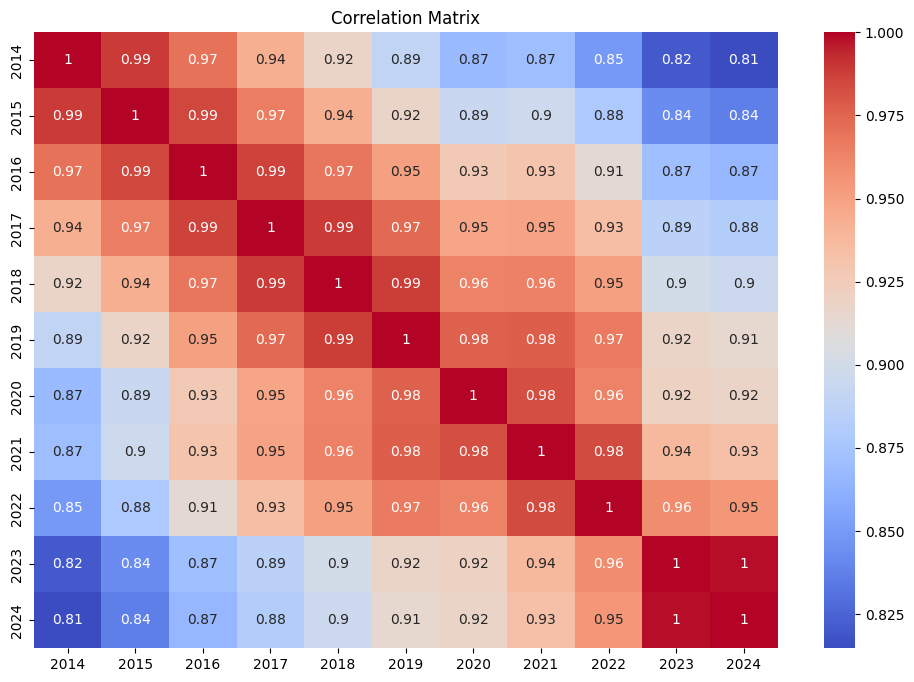

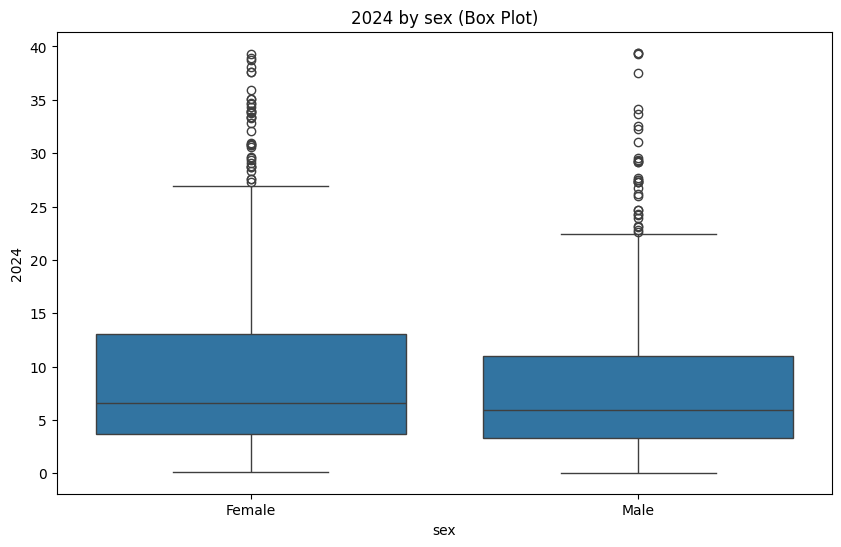

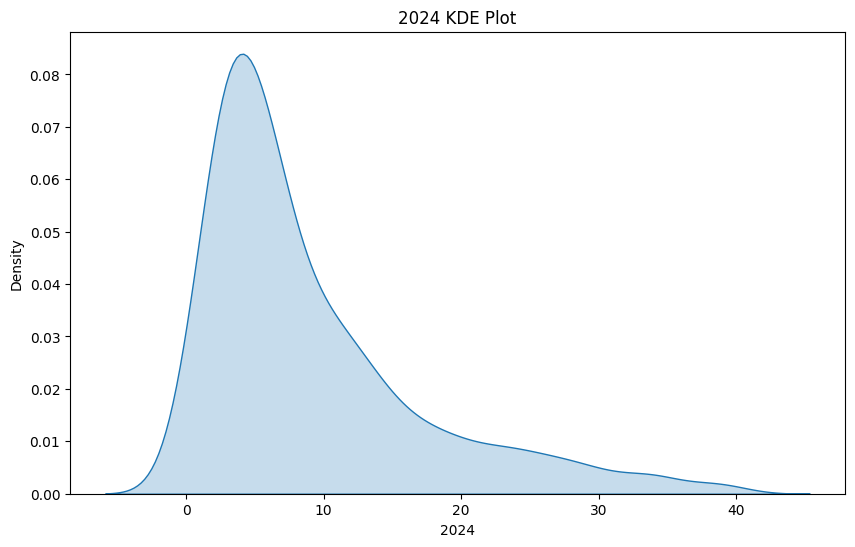

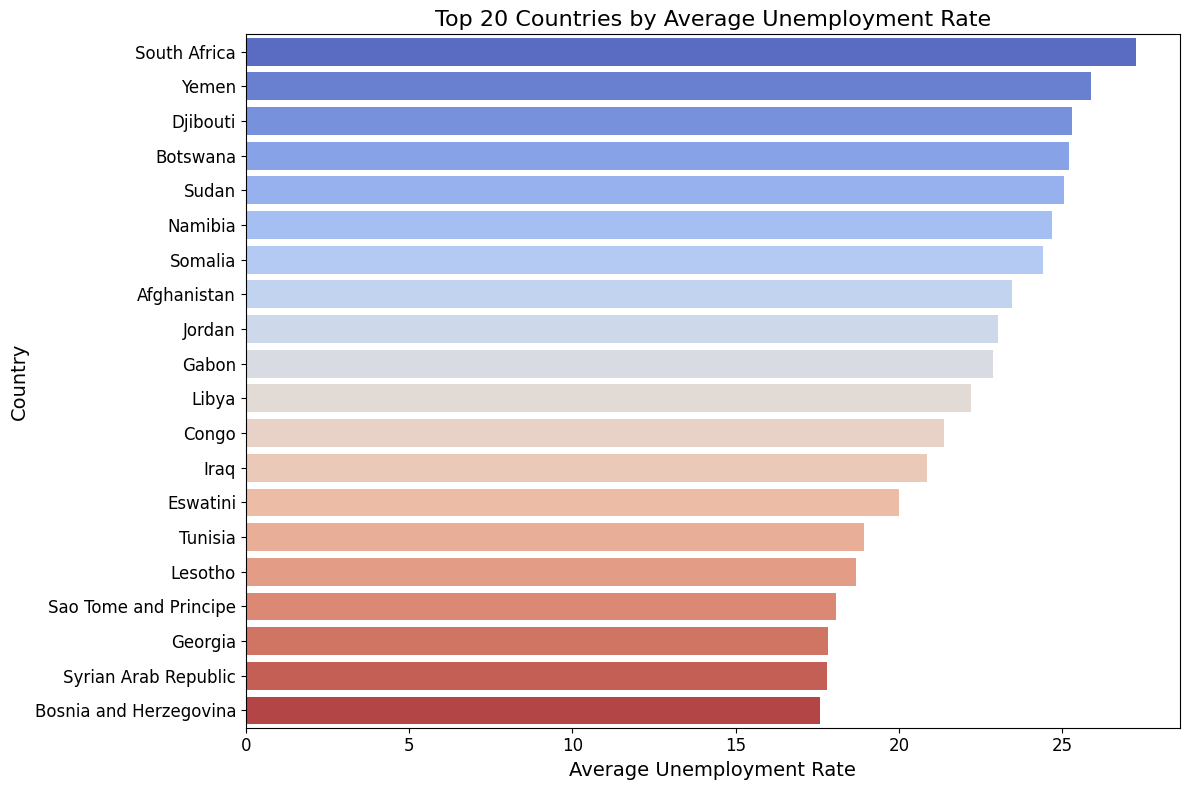

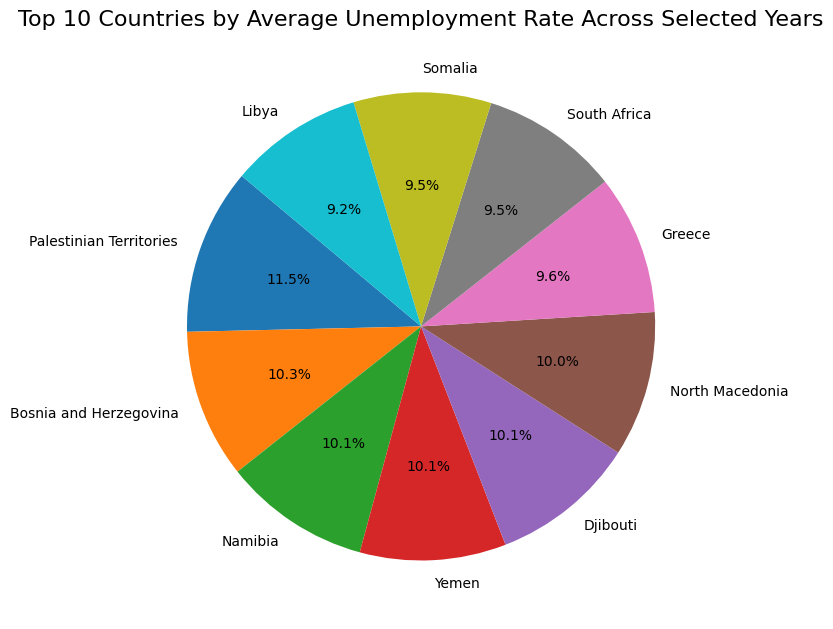

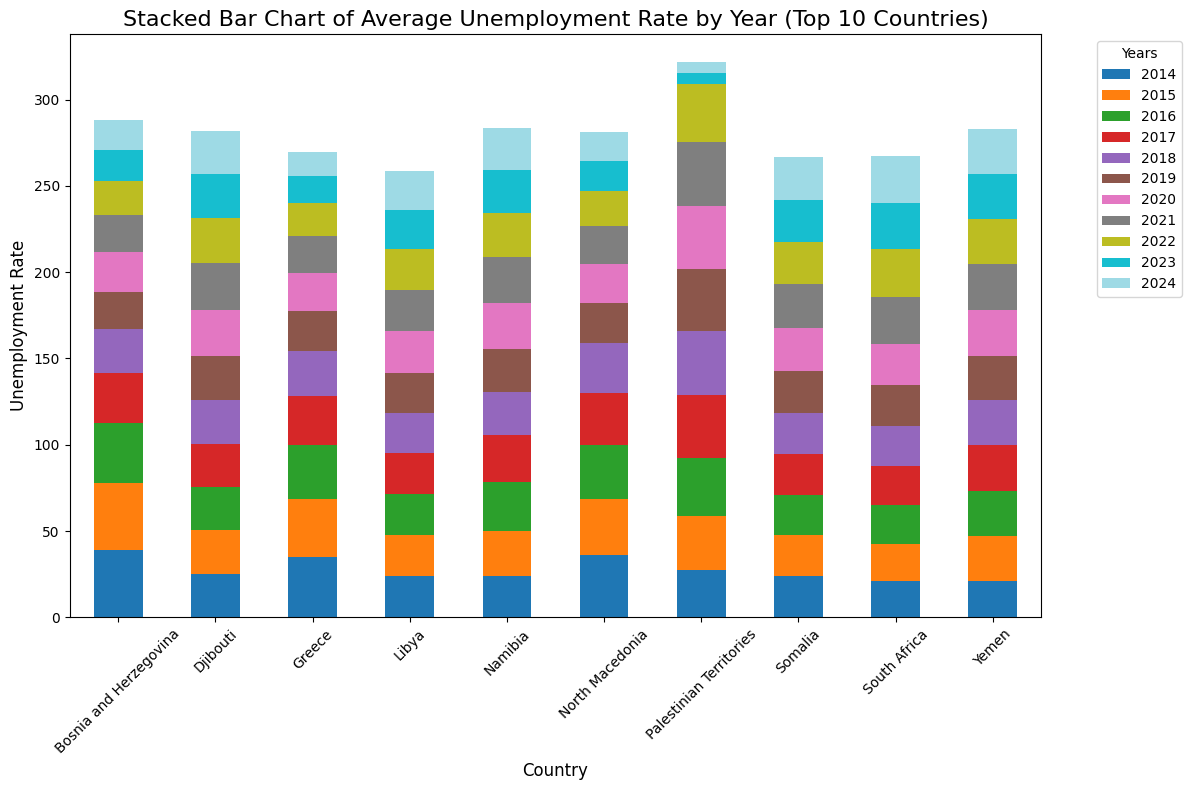

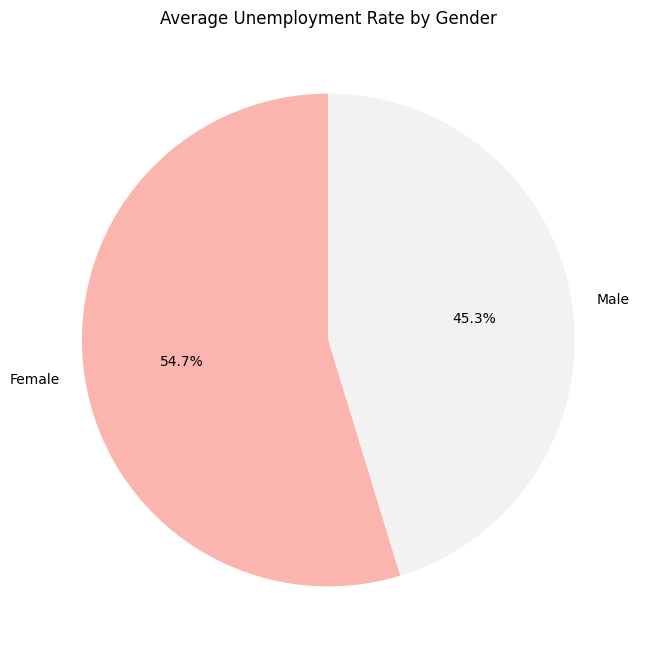

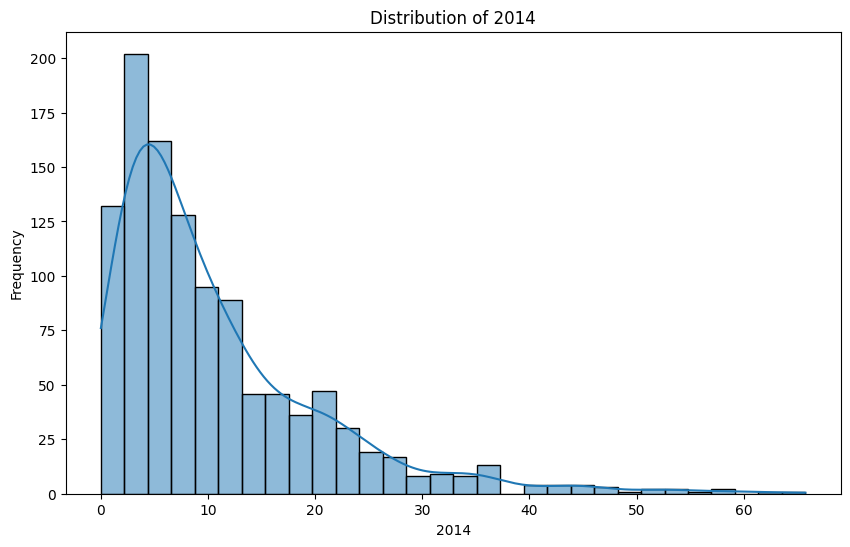

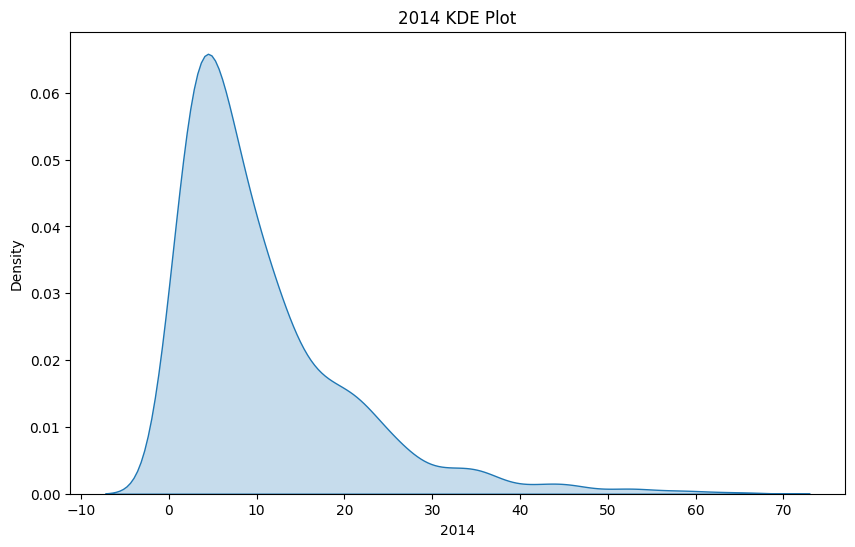

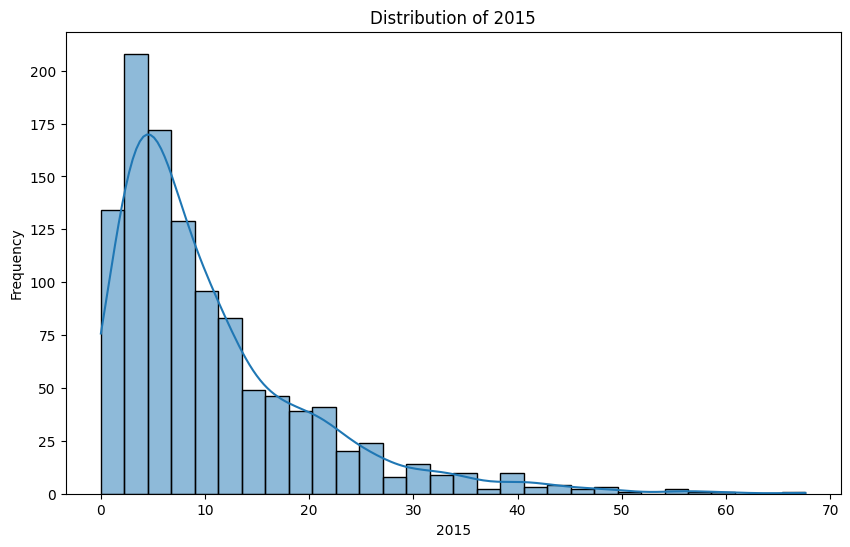

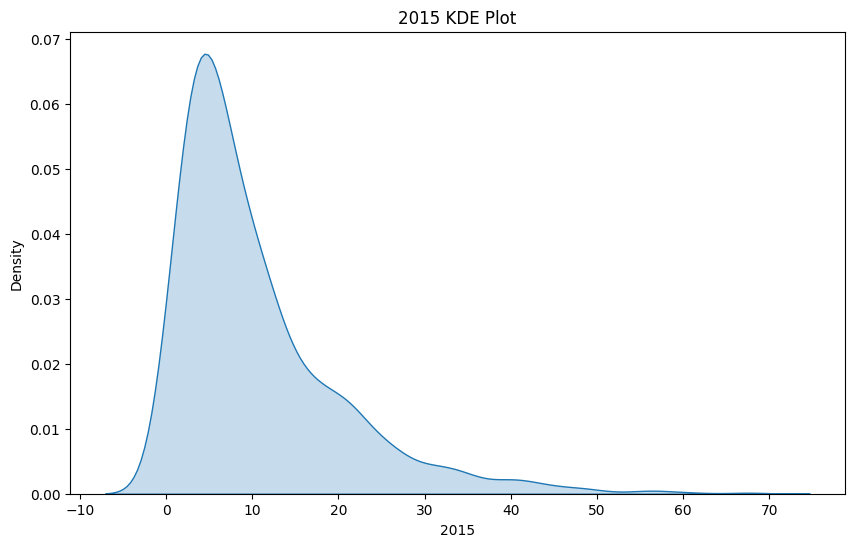

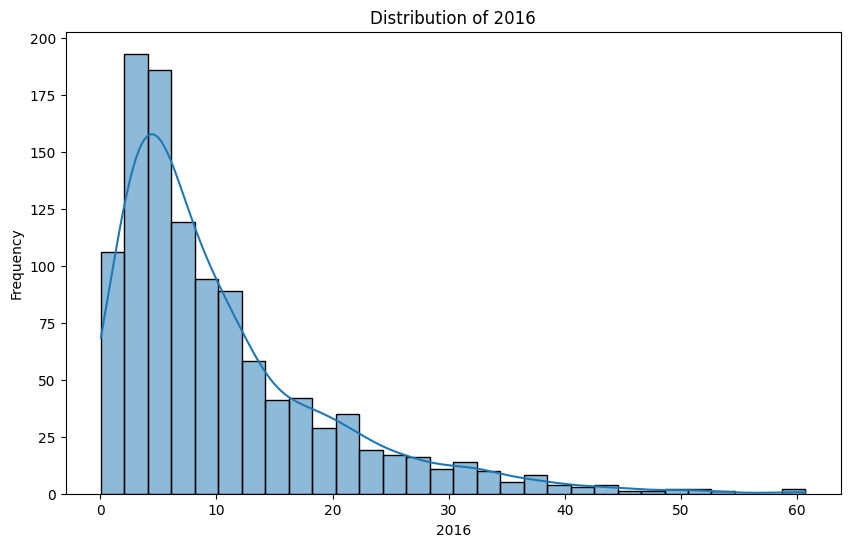

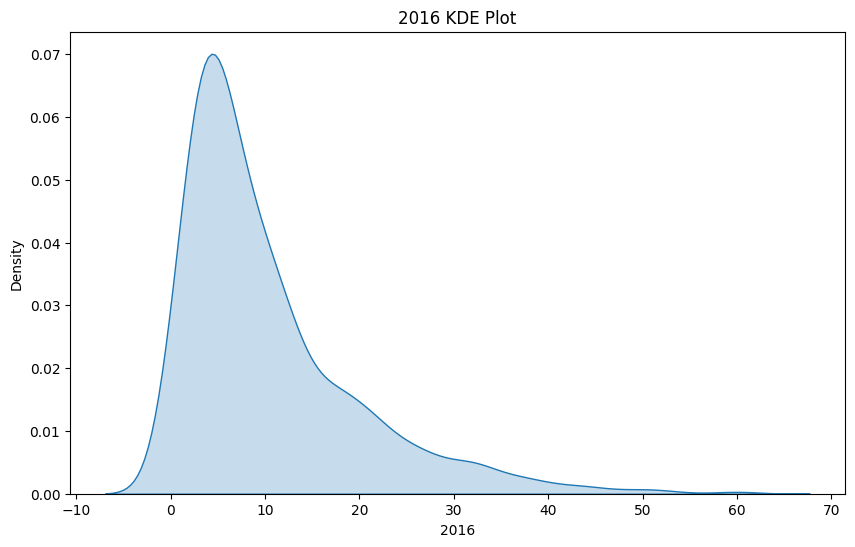

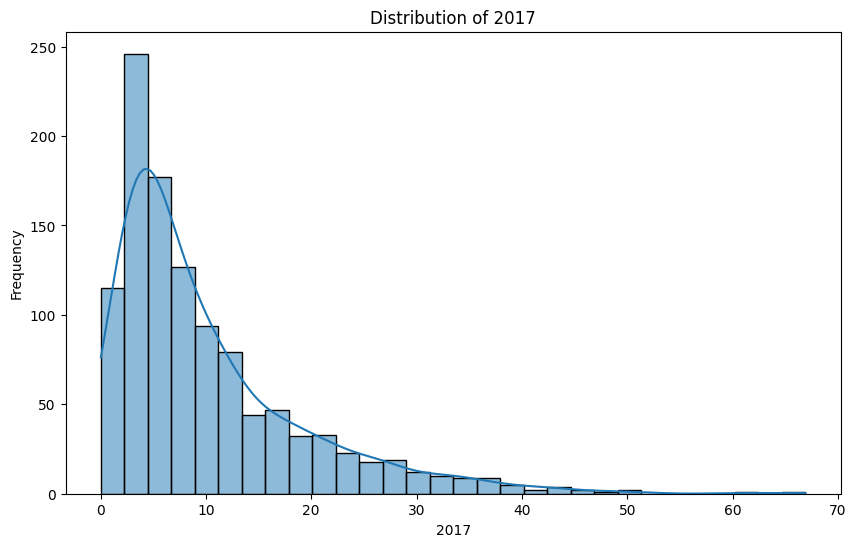

In [ ]:
# Main function
def main():
    filepath = 'global_unemployment_data.csv'  # Update with your file path
    df = load_dataset(filepath)
    
    if df is not None:
        summarize_dataset(df)
        visualize_missing_values(df)
        df = handle_missing_data(df)
        df = remove_duplicates(df)
        
        # Define years for analysis
        years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
        country_column = 'country_name'
        gender_column = 'sex'
        age_group_column = 'age_group'
        rate_column = '2024'
        # Perform EDA
        display_descriptive_stats(df)
        df = remove_outliers(df, '2024')  # Remove outliers for the year 2024
        plot_distribution(df, '2024')  # Plot distribution of data for 2024
        plot_pairplot(df, ['2020', '2021', '2022', '2023'])
        plot_trend(df, years)  # Plot trend over years
        plot_correlation_heatmap(df)  # Plot correlation heatmap

        # Additional visualizations
        plot_box_plot(df, '2024', group_by='sex')  # Box plot grouped by sex
        plot_kde(df, '2024')
        plot_scatter_geo(df, '2024')
        plot_top_20_countries_by_avg_unemployment(df, rate_column='2024', country_column='country_name')
        plot_top_10_countries_pie_chart(df, years, country_column='country_name')
        plot_top_10_countries_stacked_bar_chart(df, years, country_column='country_name')



        # Plot gender unemployment pie chart
        plot_gender_unemployment_pie(df, 'sex', '2024')

        # Enhanced visualizations
        plot_all_feature_distributions(df)
        plot_all_boxplots(df)

    
    
     
    print("Plotting Unemployment Trends by Country...")
    plot_unemployment_trends(df, country_column, years)
    
    print("Plotting Average Unemployment by Gender...")
    plot_unemployment_by_gender(df, gender_column, years)
    
    print("Plotting Correlation Between Age Group and Unemployment...")
    plot_correlation_with_age_group(df, age_group_column, years)
    
    print("Plotting High Unemployment Map (Interactive)...")
    for year in years:  # Interactive map for each year
        plot_high_unemployment_map(df, country_column, year)
    
    print("Plotting Comparison of Age and Gender for Unemployment...")
    plot_age_gender_unemployment(df, age_group_column, gender_column, rate_column)
    
    compare_unemployment_by_gender_and_age(df)
    scatterplot_unemployment_by_age(df)
    countplot_and_scatterplot_unemployment(df)  
if __name__ == "__main__":
    main()


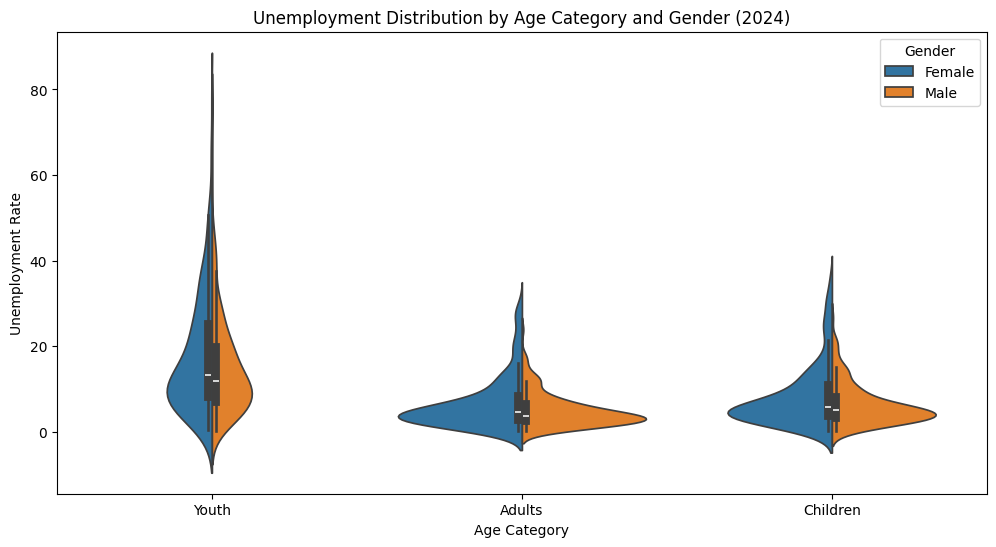

In [354]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (make sure to replace the file path with your actual file)
data = pd.read_csv('global_unemployment_data.csv')

# Filter data for a specific year (e.g., 2024) and specific variables
data_2024 = data[['country_name', 'age_categories', 'sex', '2024']]

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='age_categories', y='2024', hue='sex', data=data_2024, split=True)

# Add labels and title
plt.title('Unemployment Distribution by Age Category and Gender (2024)')
plt.xlabel('Age Category')
plt.ylabel('Unemployment Rate')
plt.legend(title='Gender')

# Display the plot
plt.show()


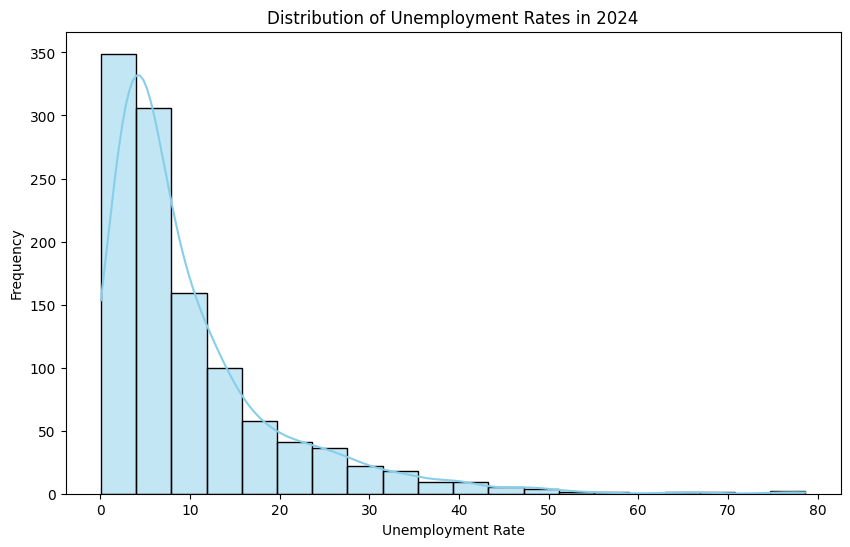

In [355]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram for unemployment rates in 2024
plt.figure(figsize=(10, 6))
sns.histplot(data['2024'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Unemployment Rates in 2024')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()


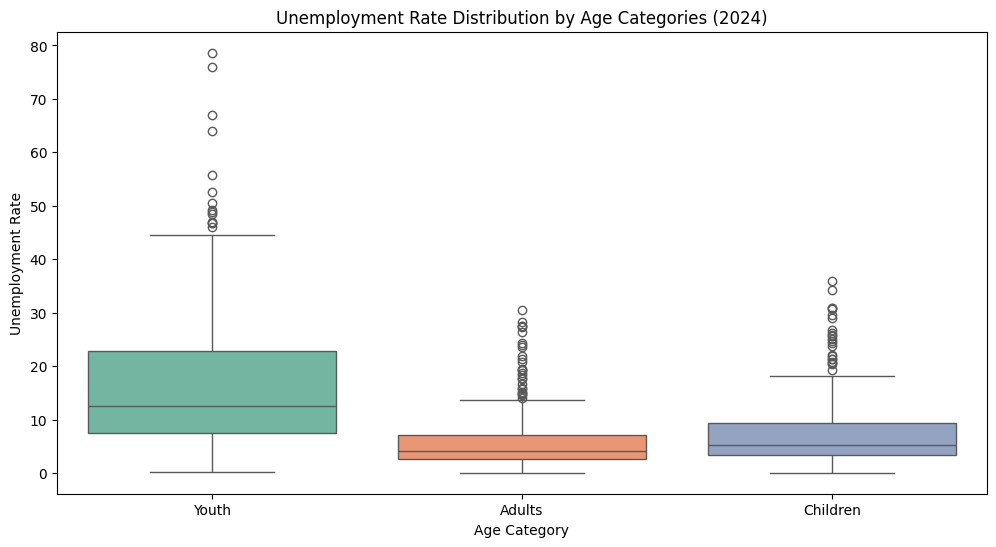

In [356]:
# Box plot to show the distribution of unemployment rates for different age categories in 2024
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_categories', y='2024', data=data, palette='Set2')
plt.title('Unemployment Rate Distribution by Age Categories (2024)')
plt.xlabel('Age Category')
plt.ylabel('Unemployment Rate')
plt.show()


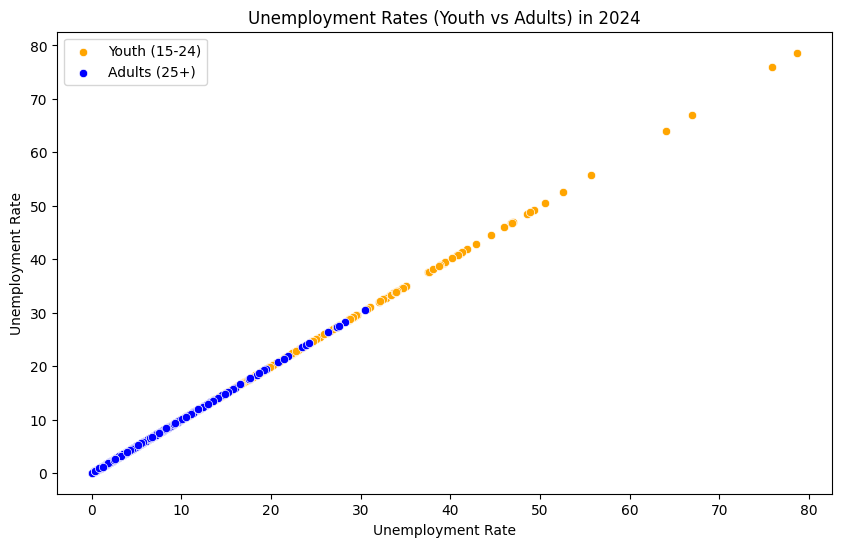

In [357]:
# Scatter plot to compare unemployment rates for Youth (15-24) and Adults (25+)
youth_data = data[data['age_group'] == '15-24']
adult_data = data[data['age_group'] == '25+']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='2024', y='2024', data=youth_data, label='Youth (15-24)', color='orange')
sns.scatterplot(x='2024', y='2024', data=adult_data, label='Adults (25+)', color='blue')
plt.title('Unemployment Rates (Youth vs Adults) in 2024')
plt.xlabel('Unemployment Rate')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()


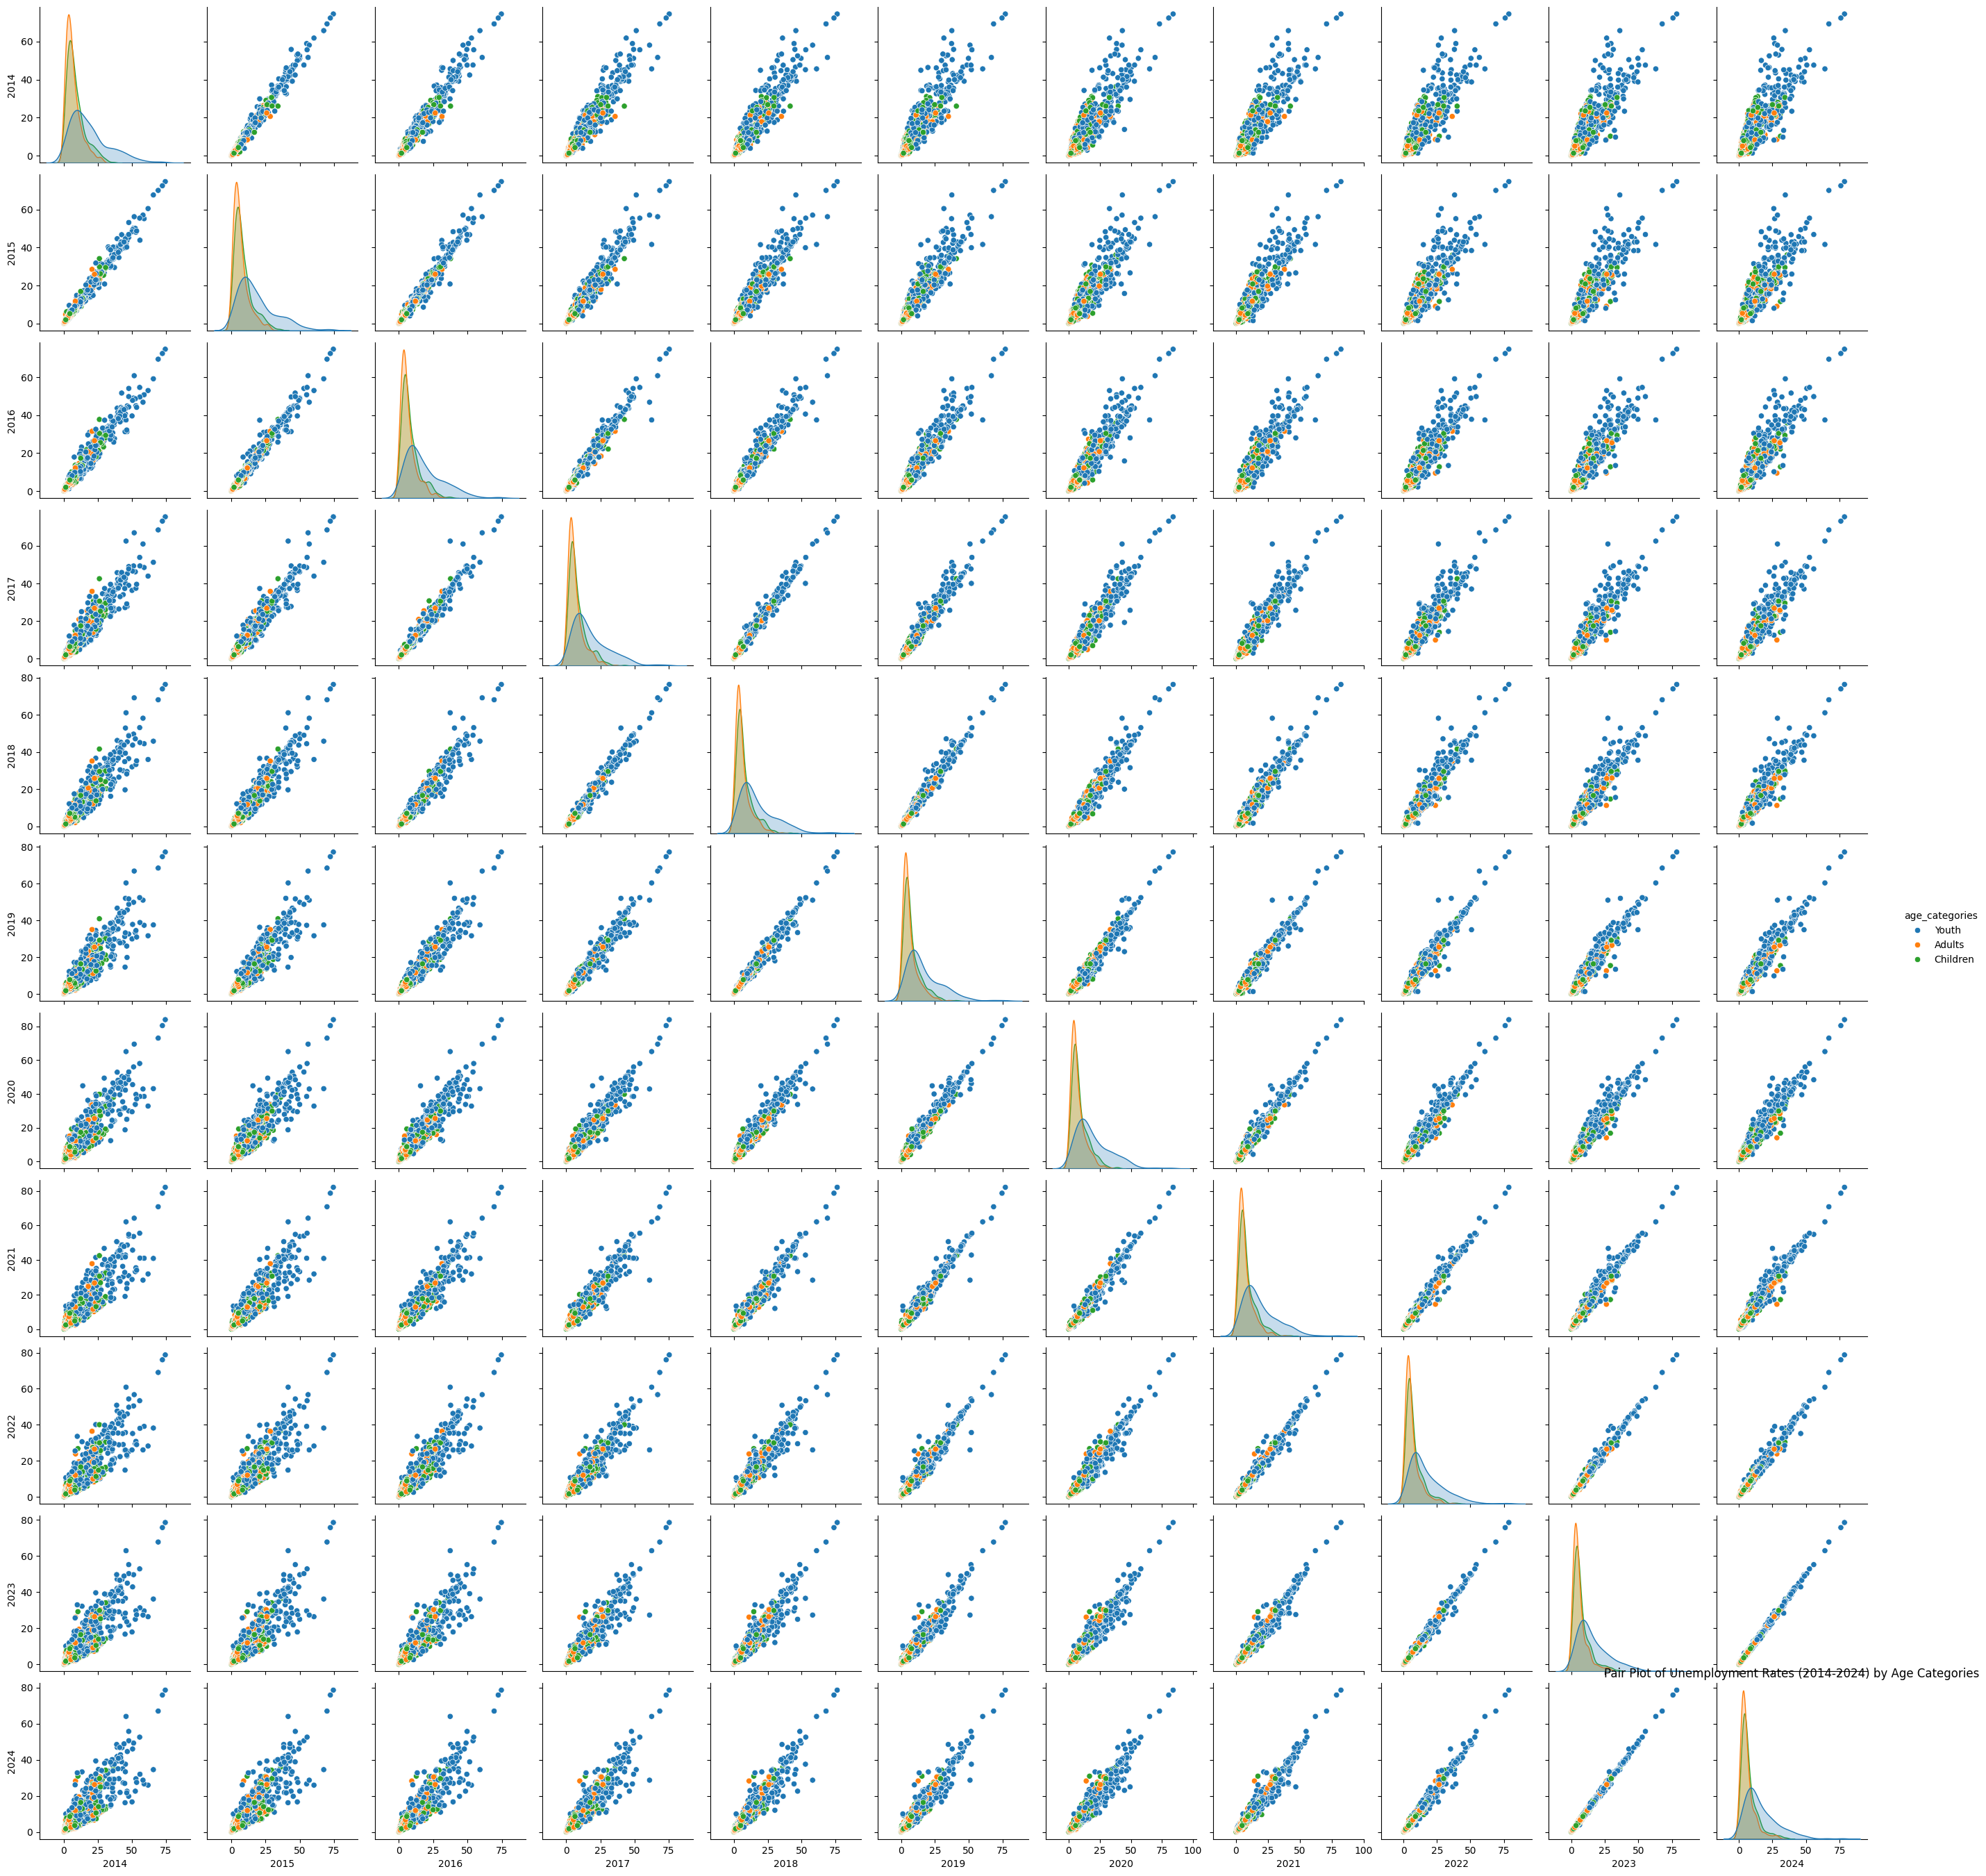

In [358]:
# Pair plot to visualize relationships between different age groups (2014-2024)
sns.pairplot(data[['age_categories', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']], hue='age_categories')
plt.title('Pair Plot of Unemployment Rates (2014-2024) by Age Categories')
plt.show()


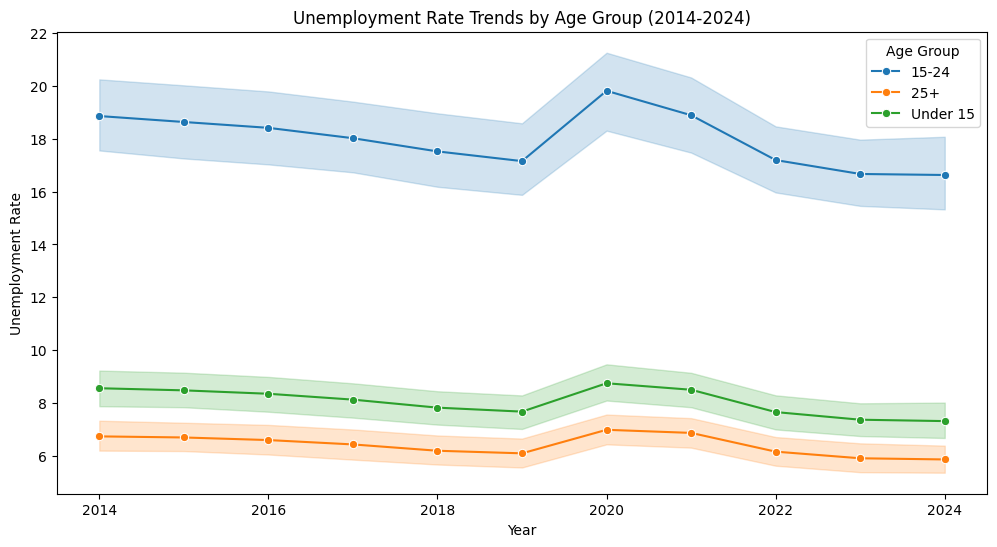

In [359]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('global_unemployment_data.csv')

# Reshape the data to long format using pd.melt
data_long = pd.melt(data, id_vars=['country_name', 'indicator_name', 'sex', 'age_group', 'age_categories'], 
                    value_vars=[str(year) for year in range(2014, 2025)],
                    var_name='Year', value_name='Unemployment Rate')

# Convert 'Year' to numeric (if it's not already)
data_long['Year'] = pd.to_numeric(data_long['Year'])

# Line plot for unemployment rate trends by age group across years (2014-2024)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Unemployment Rate', hue='age_group', data=data_long, marker='o')
plt.title('Unemployment Rate Trends by Age Group (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend(title='Age Group')
plt.show()


In [360]:
import plotly.express as px

# Treemap for unemployment rate by country, age group, and year
treemap_data = data_long.groupby(['country_name', 'age_group', 'Year'])['Unemployment Rate'].mean().reset_index()
fig = px.treemap(treemap_data, 
                 path=['country_name', 'age_group', 'Year'], 
                 values='Unemployment Rate', 
                 color='Unemployment Rate', 
                 color_continuous_scale='RdBu')
fig.update_layout(title='Treemap of Unemployment Rates by Country, Age Group, and Year')
fig.show()


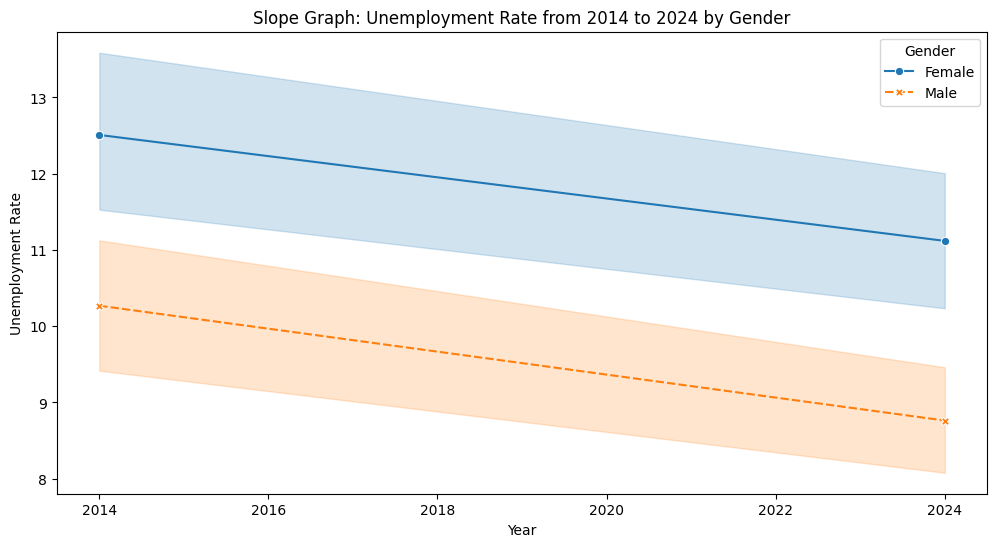

In [361]:
# Filter data for the years 2014 and 2024
slope_data = data_long[data_long['Year'].isin([2014, 2024])]

# Slope graph for gender comparison between 2014 and 2024
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Unemployment Rate', hue='sex', style='sex', markers=True, data=slope_data)
plt.title('Slope Graph: Unemployment Rate from 2014 to 2024 by Gender')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend(title='Gender')
plt.show()


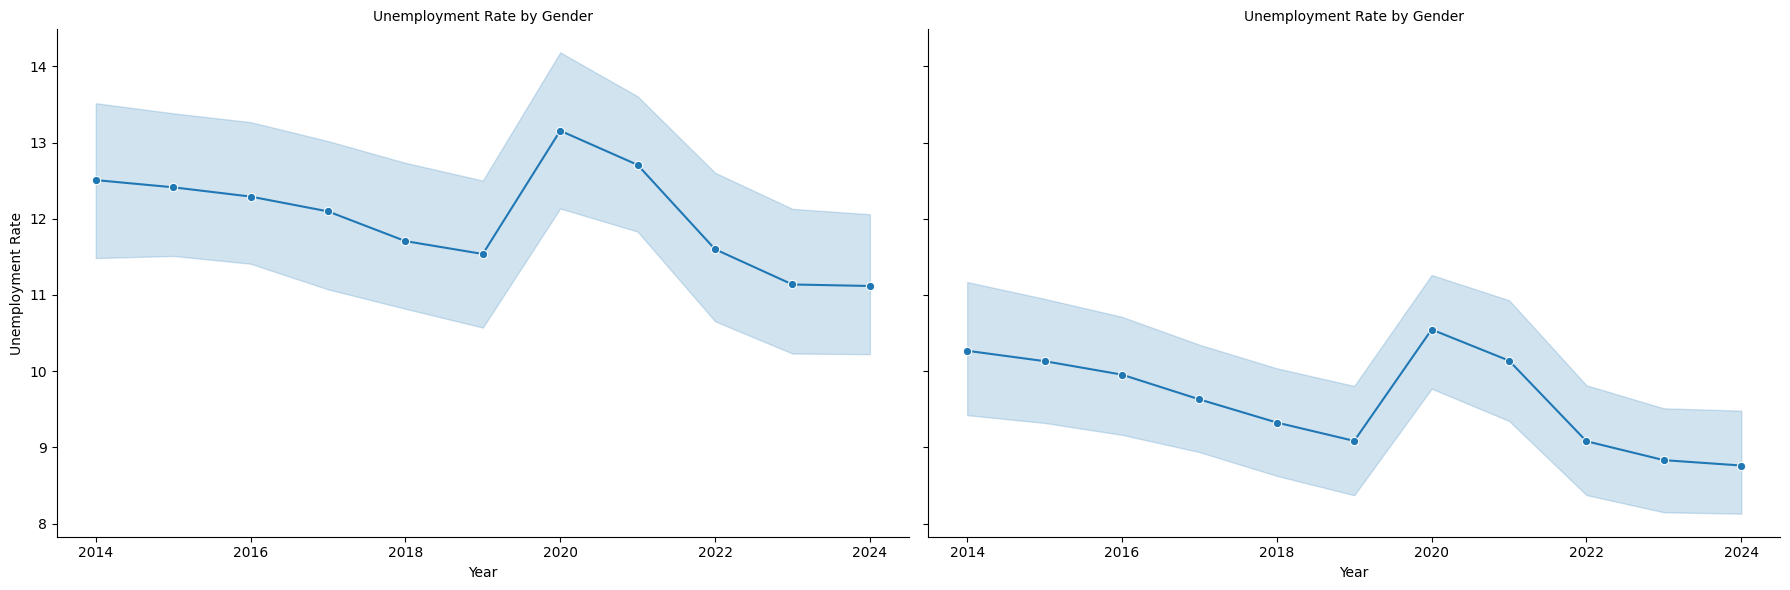

In [362]:
# Facet grid for gender over time
g = sns.FacetGrid(data_long, col='sex', height=6, aspect=1.5)
g.map(sns.lineplot, 'Year', 'Unemployment Rate', marker='o')
g.set_axis_labels('Year', 'Unemployment Rate')
g.set_titles('Unemployment Rate by Gender')
plt.show()


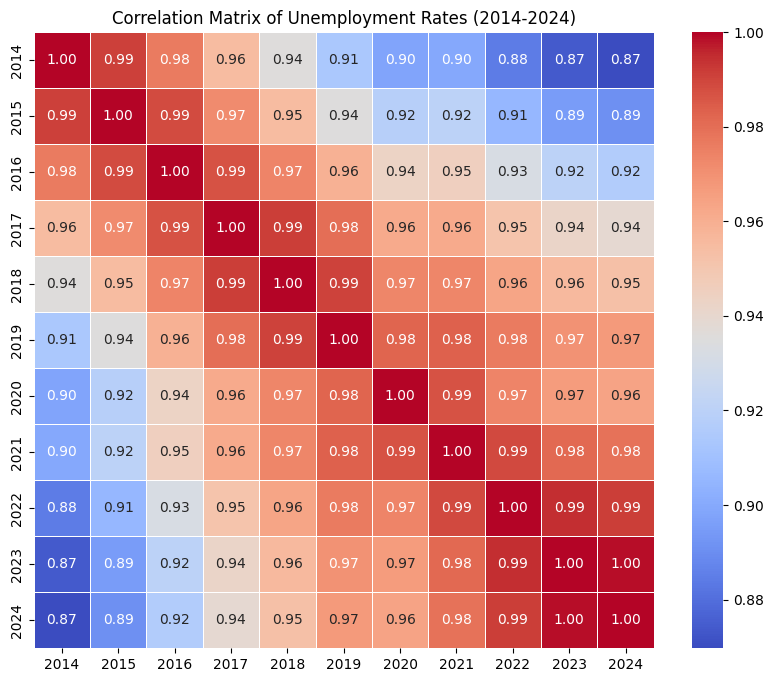

In [363]:
# Create a correlation matrix for unemployment rates across years
corr_data = data[['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Unemployment Rates (2014-2024)')
plt.show()


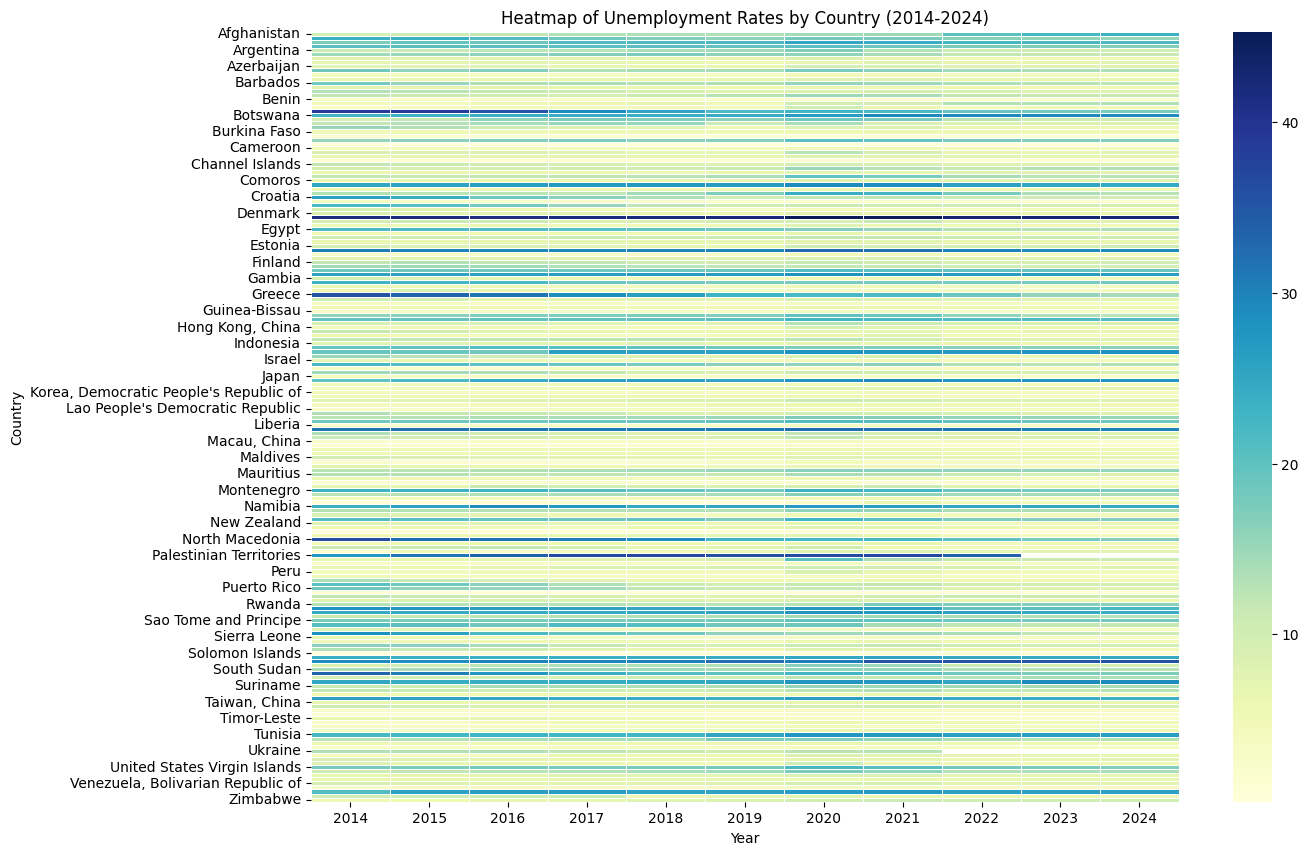

In [364]:
# Create a pivot table for heatmap (average unemployment rate by country and year)
heatmap_data = data_long.pivot_table(index='country_name', columns='Year', values='Unemployment Rate', aggfunc='mean')

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Unemployment Rates by Country (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()


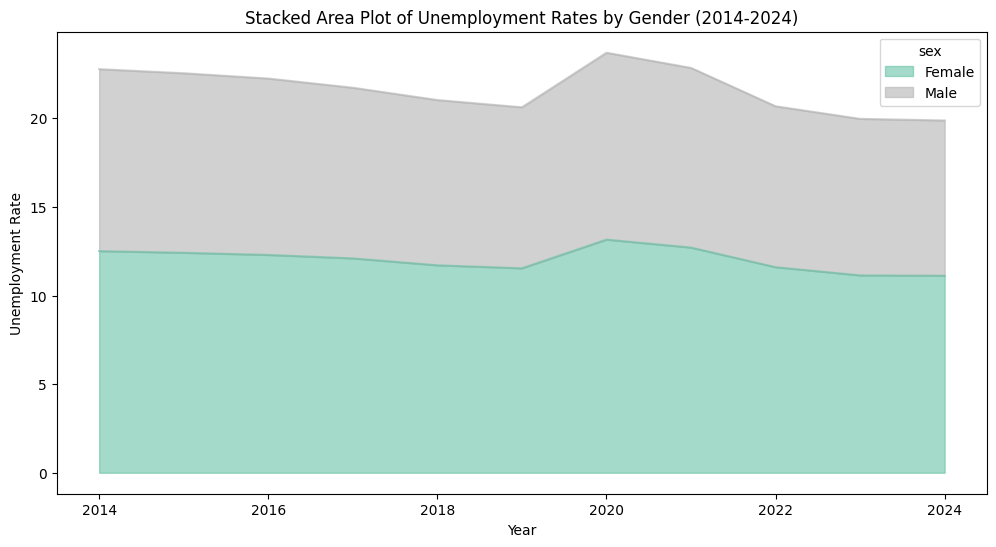

In [365]:
# Create a pivot table to reshape data for stacked area plot
data_pivot = data_long.pivot_table(index='Year', columns='sex', values='Unemployment Rate', aggfunc='mean')

# Stacked area plot
data_pivot.plot.area(figsize=(12, 6), cmap='Set2', alpha=0.6)
plt.title('Stacked Area Plot of Unemployment Rates by Gender (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.show()


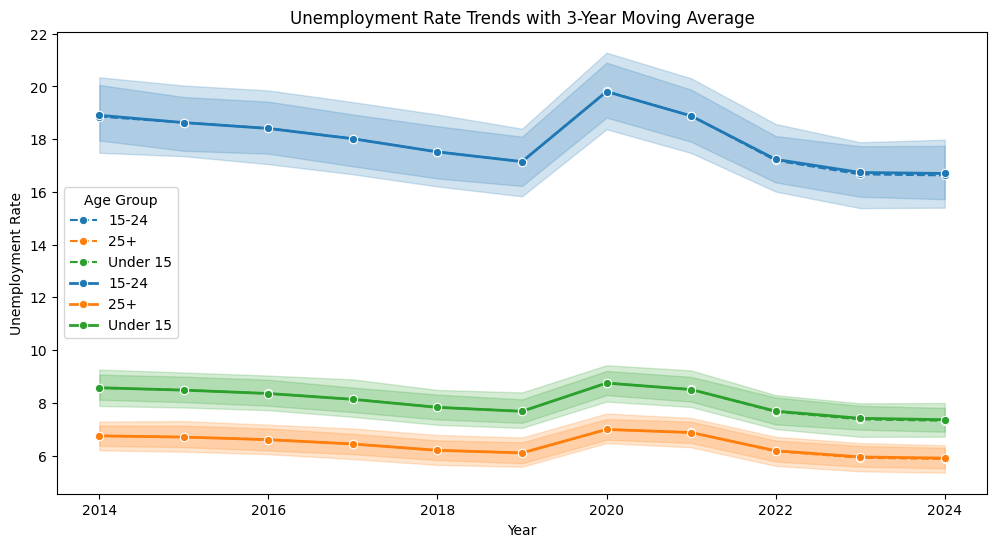

In [366]:
# Calculate the 3-year moving average for each group
data_long['Moving Avg'] = data_long.groupby('age_group')['Unemployment Rate'].transform(lambda x: x.rolling(3).mean())

# Line plot with moving average
plt.figure(figsize=(12, 6))

# Plot the original data
sns.lineplot(x='Year', y='Unemployment Rate', hue='age_group', data=data_long, marker='o', linestyle='--')

# Plot the moving average
sns.lineplot(x='Year', y='Moving Avg', hue='age_group', data=data_long, marker='o', linestyle='-', linewidth=2)

# Add title and labels
plt.title('Unemployment Rate Trends with 3-Year Moving Average')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')

# Display the legend
plt.legend(title='Age Group')

# Show the plot
plt.show()


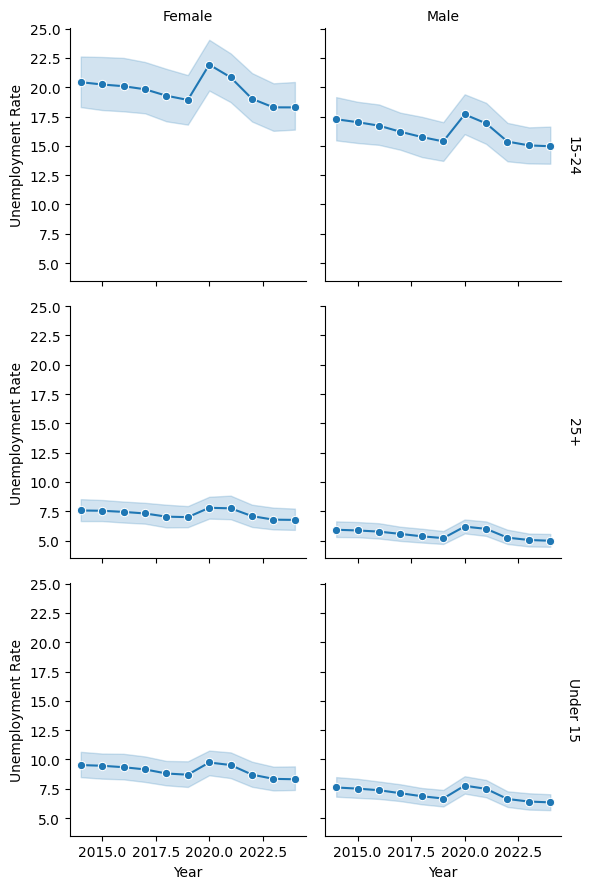

In [367]:
# Facet grid of line plots by 'sex' and 'age_group'
g = sns.FacetGrid(data_long, col='sex', row='age_group', margin_titles=True)
g.map(sns.lineplot, 'Year', 'Unemployment Rate', marker='o')
g.set_axis_labels('Year', 'Unemployment Rate')
g.set_titles(col_template='{col_name}', row_template='{row_name}')
plt.show()


In [371]:
df=pd.read_csv('global_unemployment_data.csv')
df.describe()

2014         2015         2016         2017         2018  \
count  1134.000000  1134.000000  1134.000000  1134.000000  1134.000000   
mean     11.387800    11.272444    11.122963    10.863516    10.516499   
std      11.119002    10.915942    10.742947    10.640980    10.527773   
min       0.027000     0.034000     0.038000     0.035000     0.044000   
25%       3.933500     3.993500     3.945250     3.747500     3.672750   
50%       7.697500     7.547500     7.504500     7.140500     6.706000   
75%      15.050750    14.766250    14.467500    14.142000    13.343000   
max      74.485000    74.655000    74.720000    75.416000    76.395000   

              2019         2020         2021         2022         2023  \
count  1134.000000  1134.000000  1134.000000  1128.000000  1122.000000   
mean     10.311452    11.851285    11.422645    10.340361     9.985181   
std      10.297952    11.231580    10.873412    10.264810     9.987778   
min       0.036000     0.056000     0.064000     0.067000     0.063000   
25%       3.538500     4.334500     4.153500     3.555250     3.477500   
50%       6.627500     8.067500     7.542500     6.571500     6.466000   
75%      13.285500    15.316250    14.881500    13.410000    12.914500   
max      77.173000    83.990000    82.135000    78.776000    78.541000   

              2024  
count  1122.000000  
mean      9.940089  
std       9.977512  
min       0.060000  
25%       3.459750  
50%       6.364000  
75%      12.687750  
max      78.644000

In [379]:
import pandas as pd

# Load the dataset (replace 'global_unemployment_data.csv' with your file path)
data = pd.read_csv('global_unemployment_data.csv')

# Select columns containing numeric data (assumed to represent years)
year_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Dictionary to store results for each year
all_years_statistics = {}

# Function to calculate statistics for a given column
def calculate_statistics(series):
    # Drop missing values for accurate calculations
    series = series.dropna()

    # Basic statistics
    mean_value = series.mean()
    median_value = series.median()
    mode_value = series.mode().iloc[0] if not series.mode().empty else None
    std_deviation = series.std()
    data_range = series.max() - series.min()
    variance_value = series.var()
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    quartile_deviation = (q3 - q1) / 2
    mean_deviation = (series - mean_value).abs().mean()
    coefficient_of_variation = (std_deviation / mean_value) * 100 if mean_value != 0 else None
    coefficient_of_standard_deviation = std_deviation / mean_value if mean_value != 0 else None
    coefficient_of_mean_deviation = mean_deviation / mean_value if mean_value != 0 else None
    coefficient_of_quartile_deviation = quartile_deviation / mean_value if mean_value != 0 else None
    coefficient_of_range = data_range / mean_value if mean_value != 0 else None

    # Additional statistics
    min_value = series.min()
    max_value = series.max()
    skewness = series.skew()
    kurtosis = series.kurt()
    iqr = q3 - q1

    # Determine skewness type
    if skewness > 0:
        skewness_type = "Positively Skewed"
    elif skewness < 0:
        skewness_type = "Negatively Skewed"
    else:
        skewness_type = "Symmetric"

    # Determine kurtosis type
    if kurtosis > 0:
        kurtosis_type = "Leptokurtic"
    elif kurtosis < 0:
        kurtosis_type = "Platykurtic"
    else:
        kurtosis_type = "Mesokurtic"

    # Compile results
    return {
        "Mean": mean_value,
        "Median": median_value,
        "Mode": mode_value,
        "Standard Deviation": std_deviation,
        "Range": data_range,
        "Variance": variance_value,
        "Quartile Deviation": quartile_deviation,
        "Mean Deviation": mean_deviation,
        "Coefficient of Variation (%)": coefficient_of_variation,
        "Coefficient of Standard Deviation": coefficient_of_standard_deviation,
        "Coefficient of Mean Deviation": coefficient_of_mean_deviation,
        "Coefficient of Quartile Deviation": coefficient_of_quartile_deviation,
        "Coefficient of Range": coefficient_of_range,
        "Minimum Value": min_value,
        "Maximum Value": max_value,
        "Skewness": skewness,
        "Kurtosis": kurtosis,
        "Interquartile Range (IQR)": iqr,
        "Skewness Type": skewness_type,
        "Kurtosis Type": kurtosis_type,
    }

# Calculate statistics for each year column
for year in year_columns:
    all_years_statistics[year] = calculate_statistics(data[year])

# Save results to a CSV file
results_df = pd.DataFrame(all_years_statistics).T
results_df.index.name = "Year"
results_df.to_csv('yearly_statistics.csv')

# Display results in the console
print("Yearly Statistics:")
print("=" * 50)
for year, stats in all_years_statistics.items():
    print(f"Year: {year}")
    for stat_name, value in stats.items():
        print(f"  {stat_name}: {value}")
    print("-" * 50)

# Optionally, print the full statistics table
print("\nFull Statistics Table:")
print(results_df)


Yearly Statistics:
Year: 2014
  Mean: 11.387799823633156
  Median: 7.6975
  Mode: 2.264
  Standard Deviation: 11.11900168293138
  Range: 74.458
  Variance: 123.63219842503086
  Quartile Deviation: 5.558625
  Mean Deviation: 8.043298890475256
  Coefficient of Variation (%): 97.63959548934169
  Coefficient of Standard Deviation: 0.9763959548934169
  Coefficient of Mean Deviation: 0.7063084191015511
  Coefficient of Quartile Deviation: 0.4881210669390376
  Coefficient of Range: 6.538400845919065
  Minimum Value: 0.027
  Maximum Value: 74.485
  Skewness: 2.026923616811268
  Kurtosis: 5.07124149963963
  Interquartile Range (IQR): 11.11725
  Skewness Type: Positively Skewed
  Kurtosis Type: Leptokurtic
--------------------------------------------------
Year: 2015
  Mean: 11.272444444444444
  Median: 7.547499999999999
  Mode: 0.269
  Standard Deviation: 10.915942212254908
  Range: 74.621
  Variance: 119.1577943812886
  Quartile Deviation: 5.386374999999999
  Mean Deviation: 7.883938467568097


In [382]:
import pandas as pd
import numpy as np


data = pd.read_csv('global_unemployment_data.csv')

# Select numeric columns for analysis
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Function to calculate moments
def calculate_moments(series):
    # Drop missing values for accurate calculations
    series = series.dropna()
    mean_value = np.mean(series)
    
    # Raw moments about the mean
    moment_2 = np.mean((series - mean_value) ** 2)  # 2nd raw moment (variance)
    moment_3 = np.mean((series - mean_value) ** 3)  # 3rd raw moment
    moment_4 = np.mean((series - mean_value) ** 4)  # 4th raw moment
    
    # Moments about an arbitrary origin (e.g., 50th percentile)
    origin = np.percentile(series, 50)
    moment_about_origin = np.mean((series - origin) ** 2)
    
    # Central moment
    central_moment = np.mean(series ** 2)
    
    return {
        'Moment_2 (Variance)': moment_2,
        'Moment_3': moment_3,
        'Moment_4': moment_4,
        'Moment_About_Origin': moment_about_origin,
        'Central_Moment': central_moment
    }

# Dictionary to store moments for each numeric column
moments_results = {}

# Calculate moments for each numeric column
for col in numeric_columns:
    moments_results[col] = calculate_moments(data[col])

# Convert results to a DataFrame
moments_df = pd.DataFrame(moments_results).T
moments_df.index.name = "Column"

# Save moments to a CSV file
moments_df.to_csv('moments_statistics.csv')

# Display results
print("Moments Statistics:")
print("=" * 50)
print(moments_df)


Moments Statistics:
        Moment_2 (Variance)     Moment_3       Moment_4  Moment_About_Origin  \
Column                                                                         
2014             123.523175  2778.977295  122729.393895           137.141488   
2015             119.052717  2646.179583  116218.126336           132.927928   
2016             115.309142  2463.761609  105345.458407           128.402416   
2017             113.130596  2516.252126  110369.194737           126.991443   
2018             110.736259  2519.736962  111660.976011           125.256163   
2019             105.954306  2376.038607  105569.113315           119.525811   
2020             126.037158  2924.421768  138014.330317           140.354185   
2021             118.126831  2693.716667  123533.970968           133.182353   
2022             105.272914  2364.355181  105144.448233           119.477226   
2023              99.666799  2270.502852  101342.145315           112.051434   
2024              99

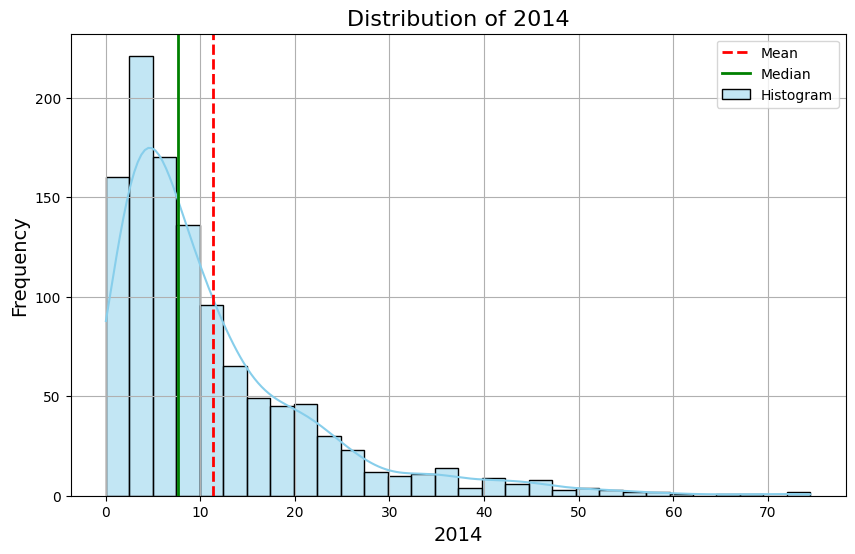

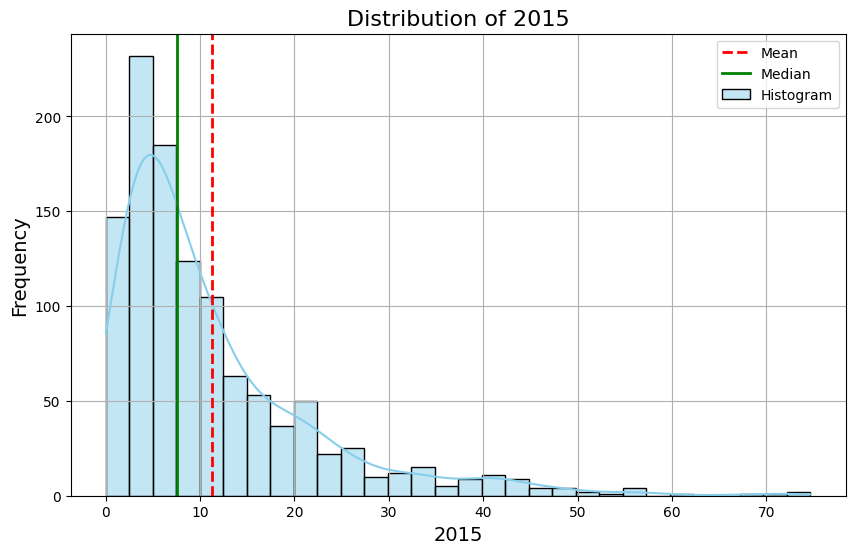

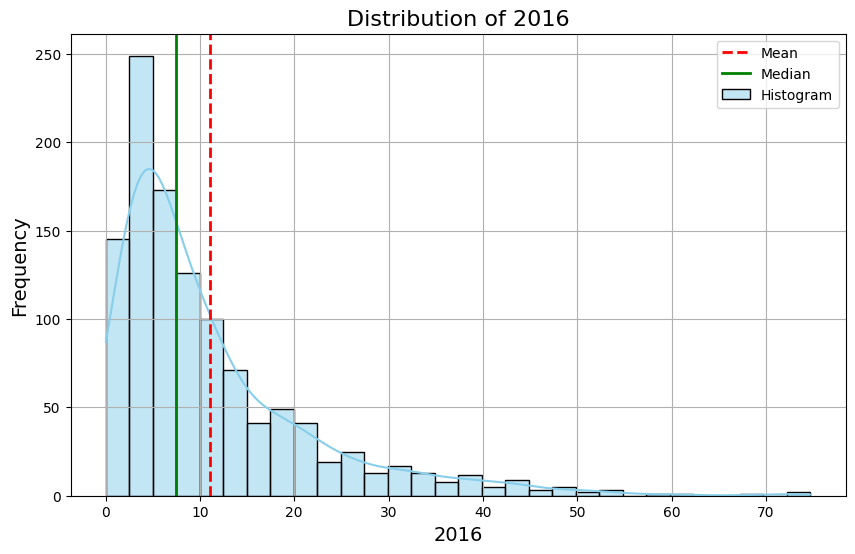

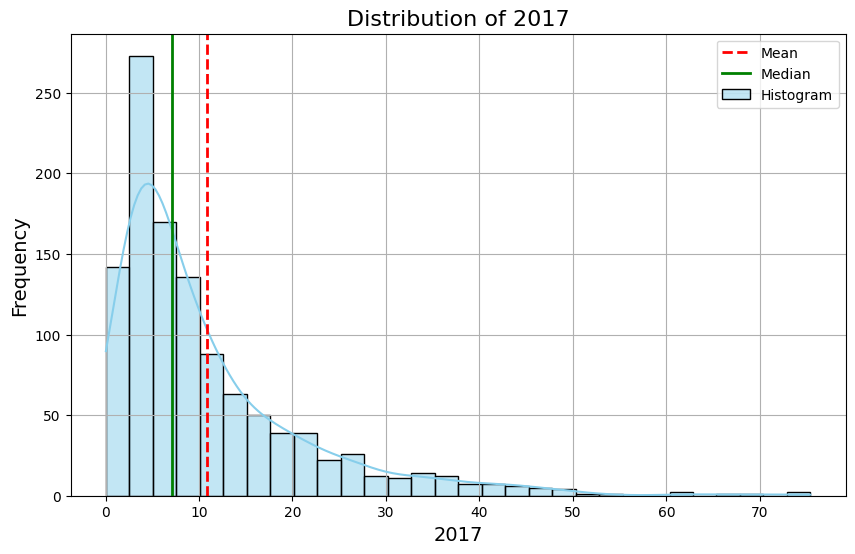

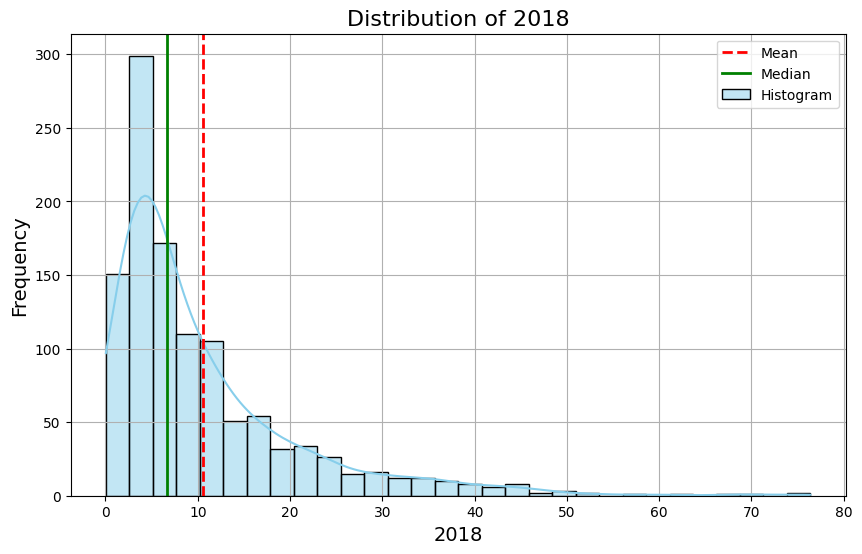

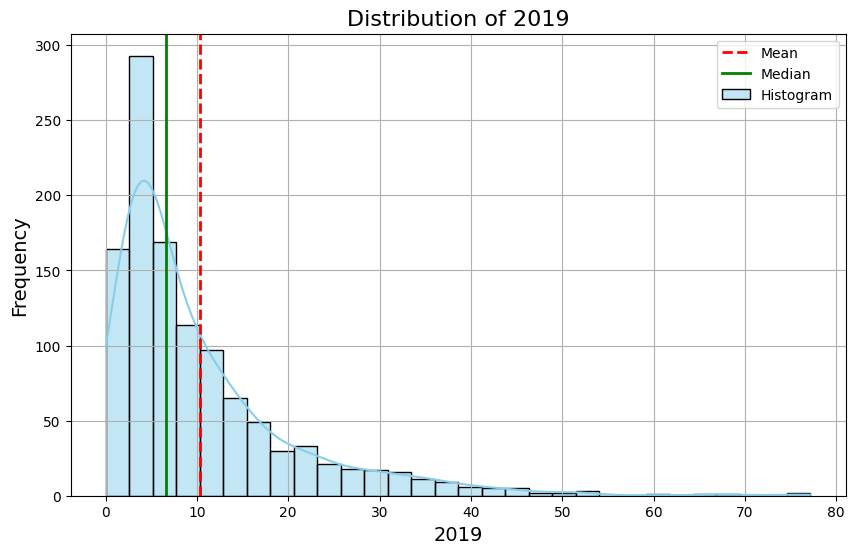

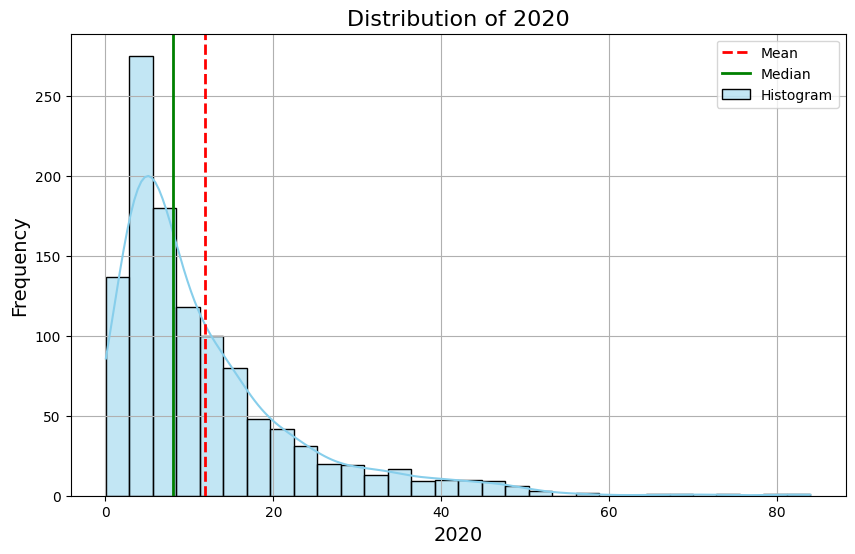

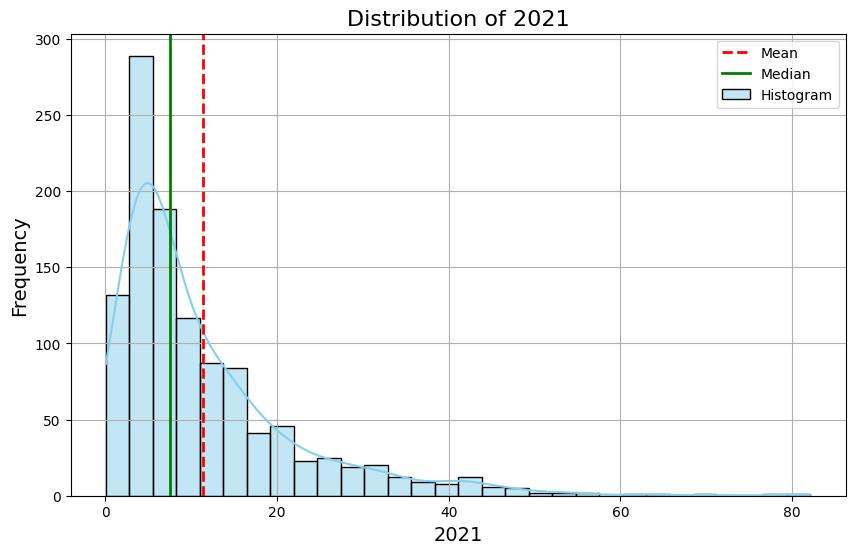

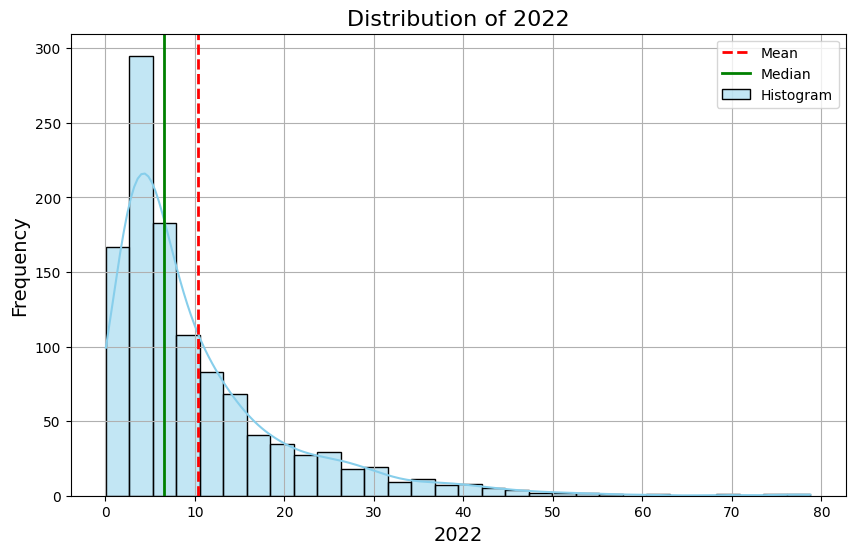

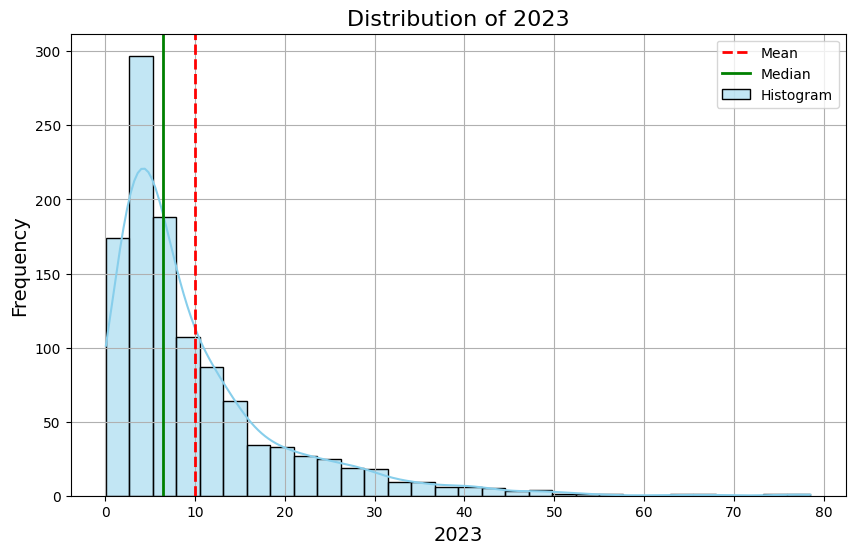

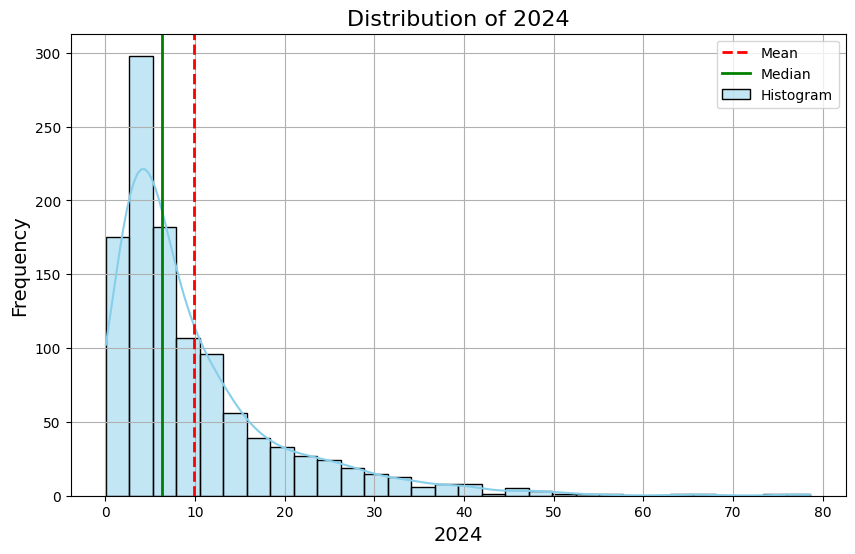

In [380]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('global_unemployment_data.csv')

# Select columns containing numeric data 
year_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Function to visualize skewness
def visualize_skewness(data, column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column_name].dropna(), kde=True, bins=30, color='skyblue', label="Histogram")
    plt.axvline(data[column_name].mean(), color='red', linestyle='--', linewidth=2, label="Mean")
    plt.axvline(data[column_name].median(), color='green', linestyle='-', linewidth=2, label="Median")
    plt.title(f"Distribution of {column_name}", fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize skewness for each year column
for year in year_columns:
    visualize_skewness(data, year)


Visualizing kurtosis for 2014...


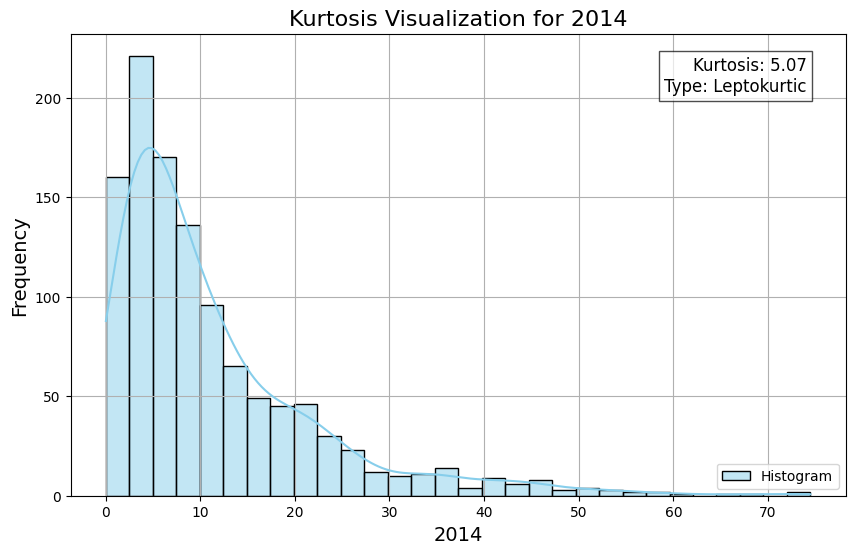

Visualizing kurtosis for 2015...


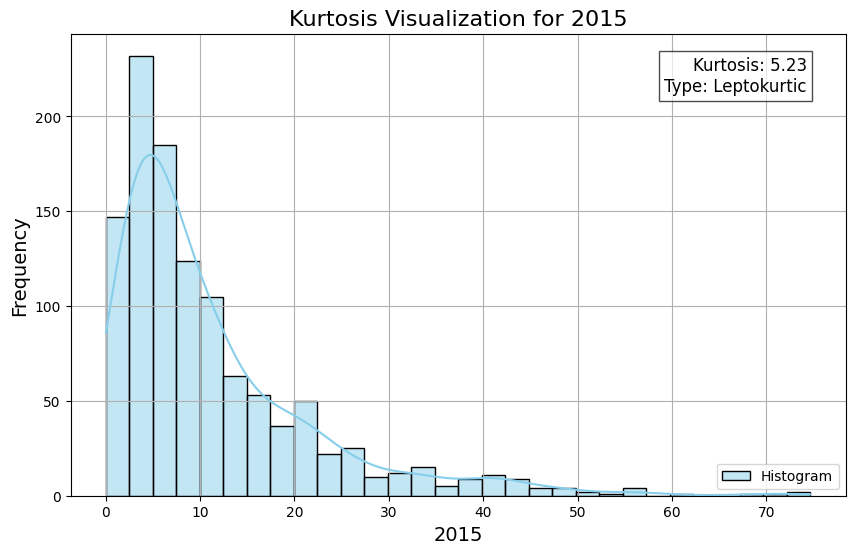

Visualizing kurtosis for 2016...


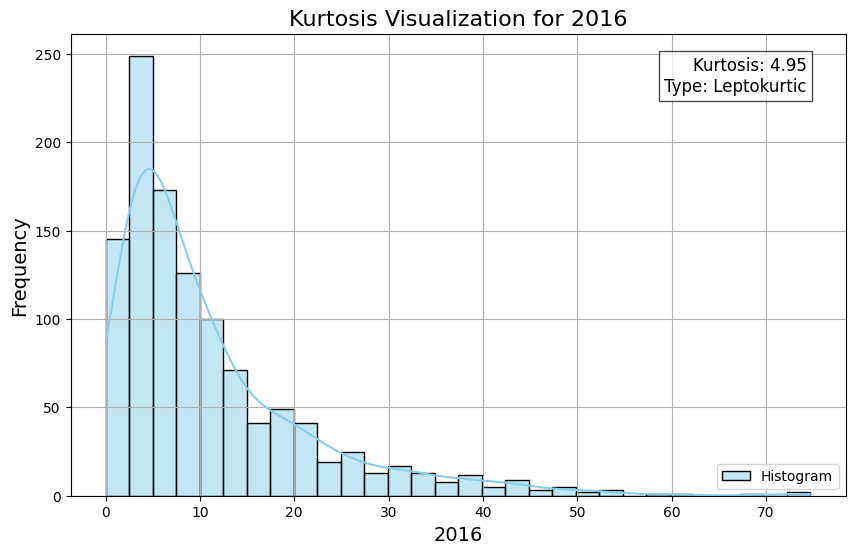

Visualizing kurtosis for 2017...


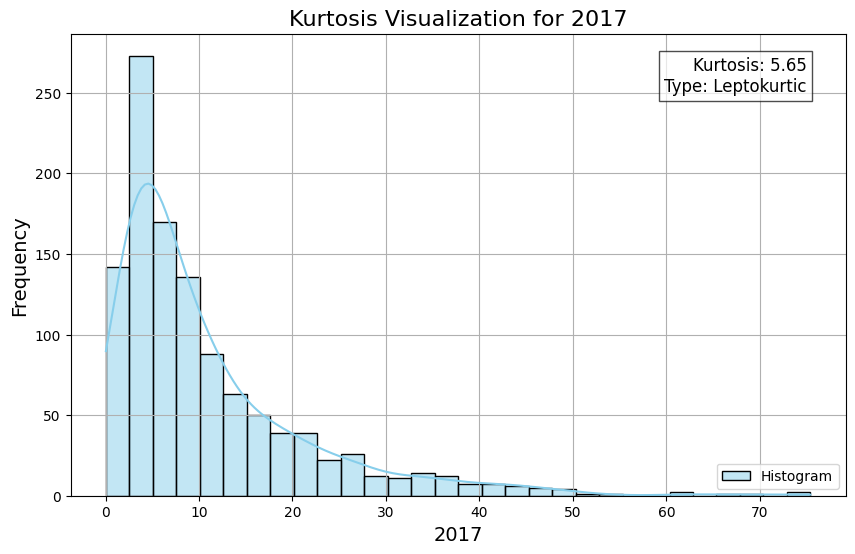

Visualizing kurtosis for 2018...


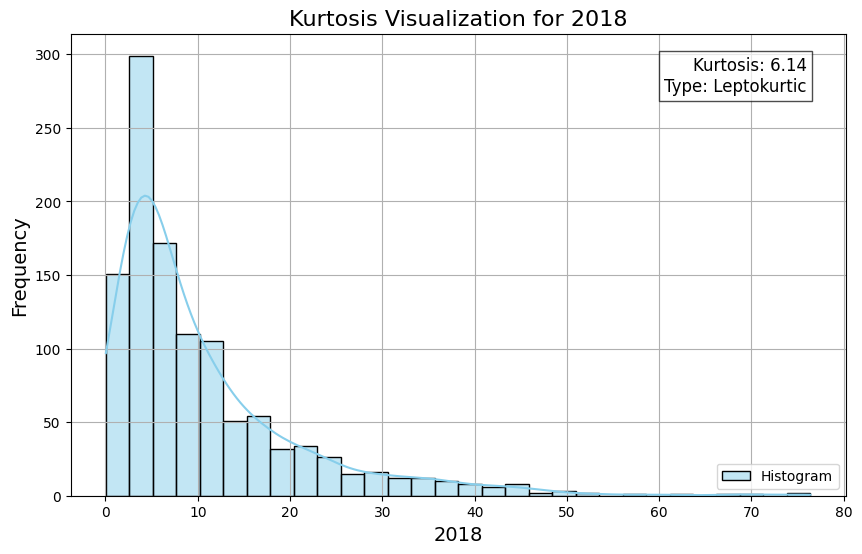

Visualizing kurtosis for 2019...


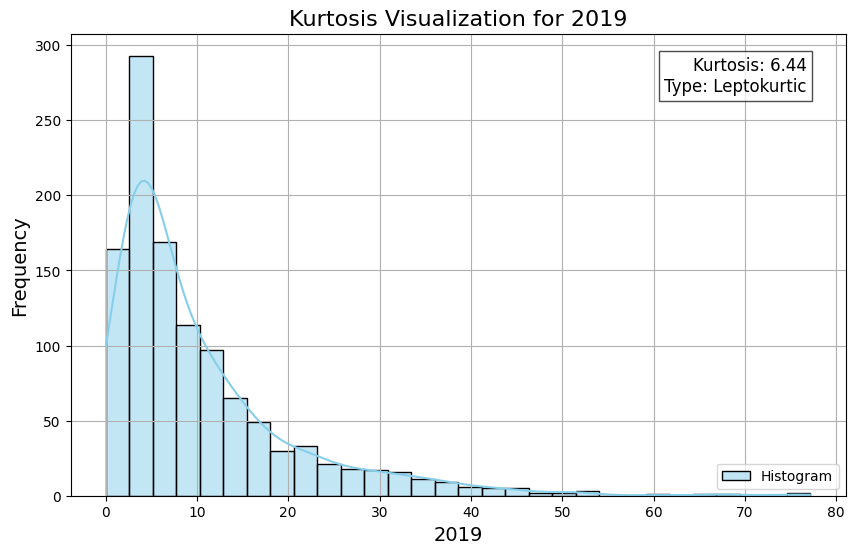

Visualizing kurtosis for 2020...


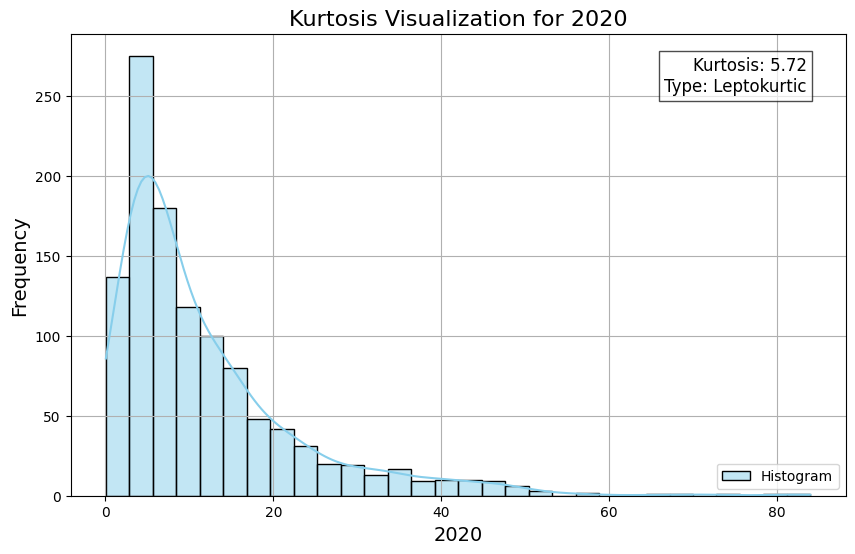

Visualizing kurtosis for 2021...


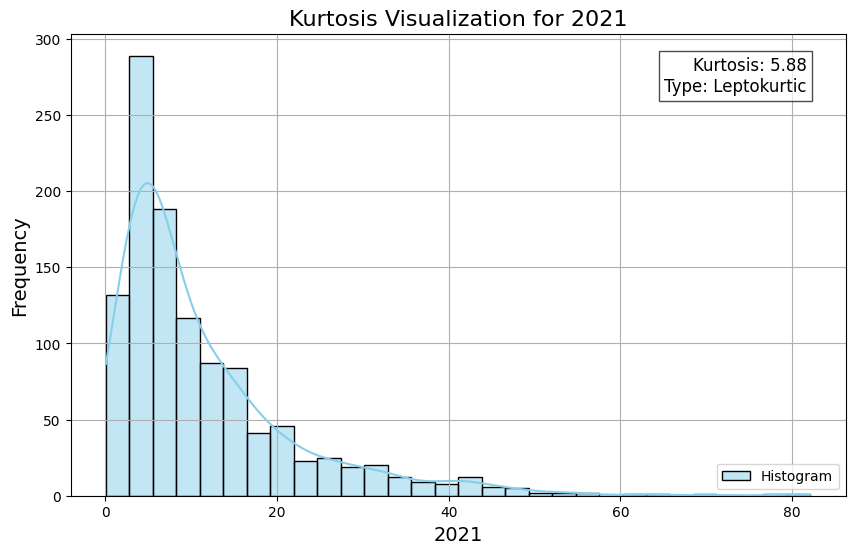

Visualizing kurtosis for 2022...


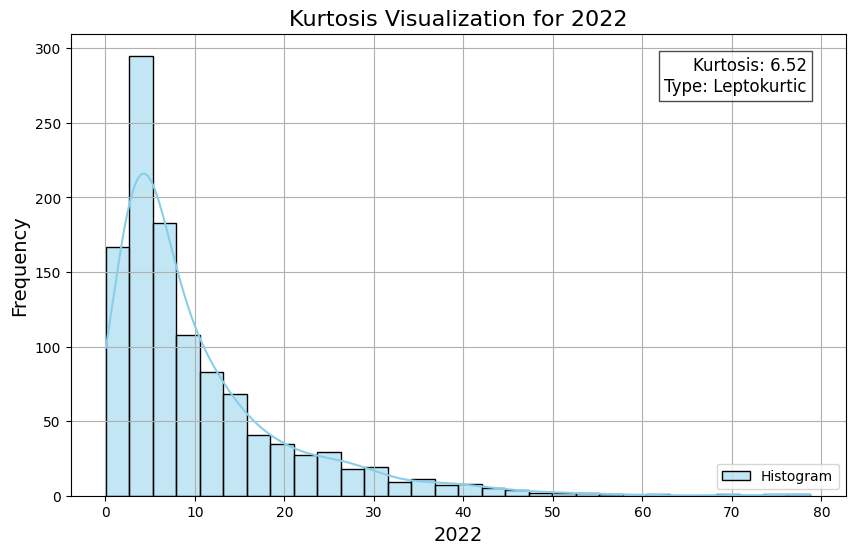

Visualizing kurtosis for 2023...


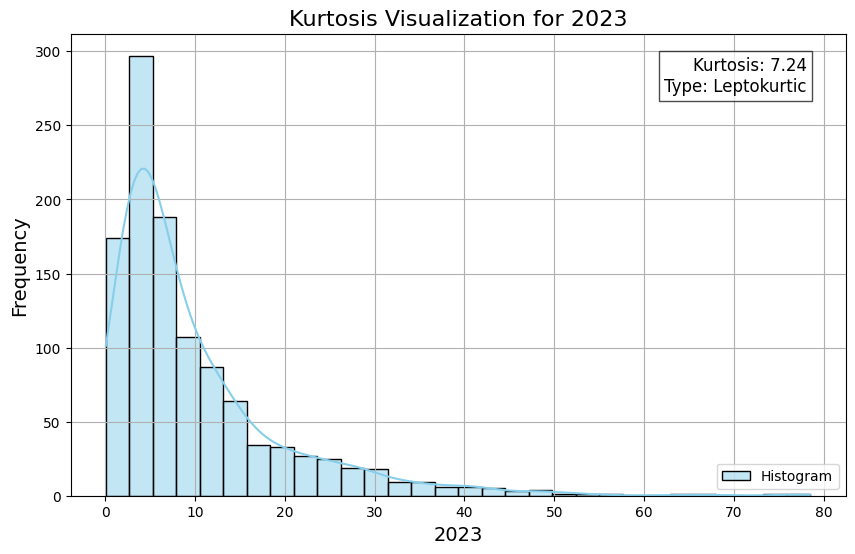

Visualizing kurtosis for 2024...


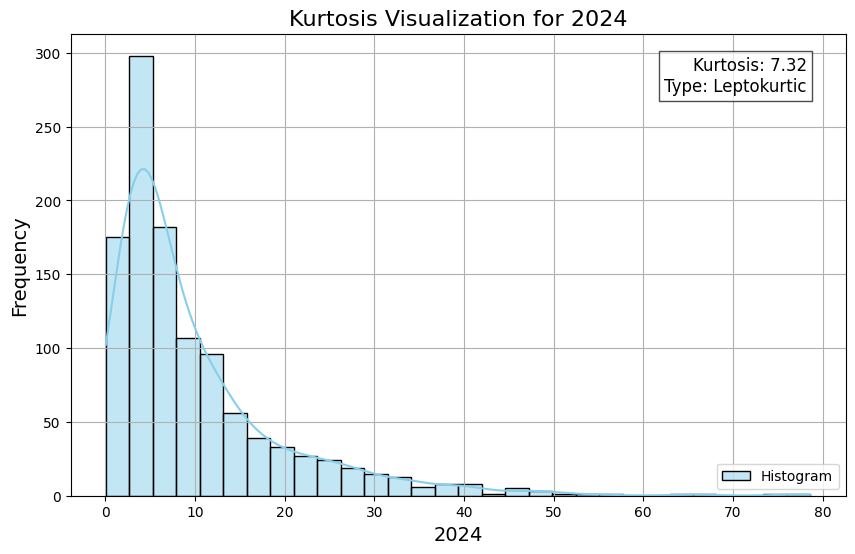

In [381]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'global_unemployment_data.csv' with your file path)
data = pd.read_csv('global_unemployment_data.csv')

# Select columns containing numeric data (assumed to represent years)
year_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Function to visualize kurtosis
def visualize_kurtosis(data, column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column_name].dropna(), kde=True, bins=30, color='skyblue', label="Histogram")
    plt.title(f"Kurtosis Visualization for {column_name}", fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    
    # Calculate kurtosis
    kurtosis_value = data[column_name].dropna().kurt()
    if kurtosis_value > 0:
        kurtosis_type = "Leptokurtic"
    elif kurtosis_value < 0:
        kurtosis_type = "Platykurtic"
    else:
        kurtosis_type = "Mesokurtic"

    # Add a text box with kurtosis information
    plt.text(
        x=0.95, y=0.95, 
        s=f"Kurtosis: {kurtosis_value:.2f}\nType: {kurtosis_type}",
        fontsize=12, color='black',
        transform=plt.gca().transAxes,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')
    )
    
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize kurtosis for each year column
for year in year_columns:
    print(f"Visualizing kurtosis for {year}...")
    visualize_kurtosis(data, year)
